<font color='red'>**Report Submission Information (must be completed before submitting report!)**</font>
* Student 1 Full Name and Number : Jinchen Liu 1009407
* Student 2 Full Name and Number : Zijia Geng 1010532
* Workshop day : Wednesday
* Workshop time : 1pm

# <font color='blue'> Workshop 3 – Deep Learning  [3 weeks] </font>

## Objectives:

* Gain hands-on experience with deep learning: deep neural networks and deep reinforcement learning. 
* Familiarise yourself with Python and Keras for _Deep Neural Networks (DNNs)_ as widely-used practical software tools.
* Familiarise yourself with some of the modern approaches used for deep reinforcement learning. 
* Basics of time series analysis relevant to engineering.
* Solve basic machine learning problems using DNNs and Keras library.
* Solve basic reinforcement learning problems.
* Connect theoretical knowledge and practical usage by doing it yourself.

> __Common objectives of all workshops:__
> Gain hands-on experience and learn by doing! Understand how theoretical knowledge discussed in lectures relates to practice. Develop motivation for gaining further theoretical and practical knowledge beyond the subject material.

## Overview:
The [history of artificial neural networks](https://en.wikipedia.org/wiki/Artificial_neural_network#History) is full of ups and downs. People got excited about and ignored them multiple times since mid 20th century. As of early 21st century, artificial neural networks have enjoyed a big comeback in the form of [deep learning and DNNs](https://en.wikipedia.org/wiki/Deep_learning).  This last wave rides on important and un-ignorable trends including rapid advances in computing (CPUs, GPUs and specialised hardware), availability of sensors/data, and abundance of storage. While modern DNNs have already been applied to traditional problems in computer science such as image recognition and information retrieval with great success, their influence on engineering applications are only starting to be felt. 

In this workshop, you will learn about basics of time-series analysis and how to solve various machine learning problems using DNNs. Doing this yourself will give you a chance to connect theoretical knowledge and practical usage. We will start with some of the data sets we have used in the previous workshop, which will make it easier to compare and contrast different approaches. More interesting problems will be posed as open-ended (and optional).

You will also familiarise yourself with [Keras, Python Deep Learning Library](https://keras.io/), which is chosen for its popularity but most importantly ease-of-use. Keras often uses the underlying and more flexible [TensorFlow](https://www.tensorflow.org/) framework. As usual, the tools and data in this workshop are chosen completely for educational reasons (simplicity, accessibility, cost). There are and will be better Deep Learning frameworks and more complex data sets but it is not realistic to cover all in limited time.

> In the future, you should consider learning additional Deep Learning software packages and libraries. Finding the right tool for the right job is an important skill obtained through knowledge and experience. 




## Workshop Preparation: 

You can start your workshop early to learn much more! We will give you a lot of time to finish the tasks but those are the bare minimums. Just like in the lectures, the topics we cover in the workshops are quite deep and we can only do so much in two hours. There is much more to learn and being prepared for the workshop is one of the best ways to gain more knowledge! For example, you can easily answer some of the initial questions in each workshop by yourself.

> __Self-learning__ is one of the most important skills that you should acquire as a student. Today, self-learning is much easier than it used to be thanks to a plethora of online resources.
For this workshop, start by exploring the resource mentioned in the preparation steps below.

### Workshop Preparation Steps:

1. Common step for all workshops: read the Workshop Manual (Jupyter Notebook) beforehand!
2. Review relevant lecture slides on machine learning.
3. Read/check relevant reading material and links from Canvas
4. Check the embedded links below hints and background.
5. _\[optional\]_ _You can start with workshop tasks and questions_

### Additional packages to install

In this workshop, we will use Tensorflow and Keras. If you are using a lab computer, _it should be already there in your Anaconda environment (please check!)_. If not or you are using your own device, the best way to go forward is creating a new environment (e.g you can name it _tfenv_), which you can do in _Anaconda Navigator_ and then installing **tensorflow** on that environment.

Alternatively, you can create the environment using [these instructions](https://www.pugetsystems.com/labs/hpc/How-to-Install-TensorFlow-with-GPU-Support-on-Windows-10-Without-Installing-CUDA-UPDATED-1419/#Step3%29CreateaPython\) followed by the command
_conda install tensorflow-gpu_ or _conda install tensorflow-gpu_ in case you wish to make use your computer's [NVIDIA graphics card](https://www.tensorflow.org/install/gpu). Note that installing tensorflow in either case pulls all the necessary packages including scipy, scikit etc. *In case this does not happen install (scikit-learn, matplotlib, pandas) one by one.*

Another package we will need is [**statsmodels**](https://www.statsmodels.org). You can also install it directly using _Anaconda Navigator._ or following instructions on their website.

Ask for help from your demonstrator in case you need it.

**Don't forget to launch your notebook from the right environment!**

## Tasks and Questions:

Follow the procedures described below, perform the given tasks and answer the workshop questions __on the Python notebook itself!__ The marks associated with each question are clearly stated. Keep your answers to the point and complete to get full marks! Ensure that your code is clean and appropriately commented. 

__The resulting notebook will be your Workshop Report!__

> __The goal is to learn__, NOT blindly follow the procedures in the fastest possible way! __Do not simply copy-paste answers (from Internet, friends, etc.). You can and should use all available resources but only to develop your own understanding. If you copy-paste, you will pay the price in the final exam!__


**This workshop has 50 points.** 

# Section 1: DNNs for Classification

We will use first the now-familiar two-moon data set as an exercise for classifying with DNNs. This will help you to learn basics of Keras and deep learning on a problem which you have already solved with classical ML methods.

**Note** remember that Scikit Learn uses the [numpy random state](https://docs.scipy.org/doc/numpy-1.15.1/reference/generated/numpy.random.seed.html#numpy.random.seed). See the code below and uncomment as instructed for repeatable results.

### Important Note on Random Number/Vector Generation

**Each group has to use a different number seed (which is an arbitrary number as illustrated above) and groups cannot share seeds. The pseudo-randomness is used here to create diversity. Otherwise, if groups use the same seed, the results will be the same (opening the door to plagiarism) and significant number of points will be taken off! As a practical hint, you can use a modified-combination of your student numbers.**

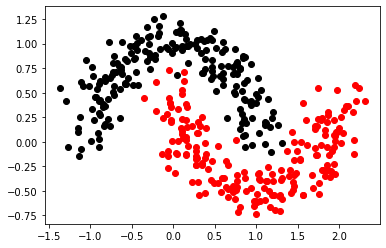

In [2]:
#matplotlib notebook
import pandas as pd
import numpy as np
from scipy import optimize
import matplotlib.pyplot as plt
import matplotlib
from sklearn.model_selection import train_test_split
from sklearn import cluster, datasets, mixture
from sklearn.cluster import KMeans
from sklearn.utils import shuffle

# Set a random seed as you did in optimisation workshop by uncommenting the line below!
#np.random.seed(Put here a group-specific number!)
np.random.seed(1009407)

# Create a new moons data set
new_moons = datasets.make_moons(n_samples=400, noise=0.15)
Xm = new_moons[0] # data points
ym = new_moons[1] # 0, 1 labels of class, 200 each - giving us the ground truth

# Visualise the data set
order_ind = np.argsort(ym) # order labels, 200 each class
Xm1 = Xm[order_ind[0:200]]   # class 1 - only for visualisation
Xm2 = Xm[order_ind[201:400]] # class 2 - only for visualisation
plt.figure()
plt.scatter(Xm1[:,0], Xm1[:,1], color='black')
plt.scatter(Xm2[:,0], Xm2[:,1], color='red')
plt.show()

import warnings
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'
warnings.filterwarnings("ignore")

In [11]:
# split into training and test sets
Xmtrain, Xmtest, ymtrain, ymtest = train_test_split(Xm, ym)

## Example: DNN with Keras

We first create define our neural network (model) and compile it with an optimisation method, loss function, and metrics relevant to our problem. See the following documents as a starting point:
* Keras documentation, [guide to sequential model](https://www.tensorflow.org/guide/keras/sequential_model)
* [Tensorflow 2 Keras API](https://www.tensorflow.org/api_docs/python/tf/keras)

**We are now using Tensorflow 2 (TF2) but a lot of the online material is on TF1. Therefore, you cannot use those scripts directly anymore but it is easy to modify them to TF2!**

Older, additional information from web, e.g. [evaluating performance](https://machinelearningmastery.com/evaluate-performance-deep-learning-models-keras/) and [Reduce Overfitting](https://machinelearningmastery.com/how-to-reduce-overfitting-in-deep-neural-networks-with-weight-constraints-in-keras/)

### Reproducability and Pseudo-randomness

It is possible to get [reproducable results with Keras](https://machinelearningmastery.com/reproducible-results-neural-networks-keras/). However, this standard method (as implemented in the code below) works only with CPU implementation of tensorflow as far as I understand.

**Please don't forget to change the random seed in the code below and choose a group-specific arbitrary number as in previous workshops for full credit!**

If your computer uses CUDA/GPU, don't worry about reproducability for now. If you really wish to learn more about reproducability with CUDA/GPU _optionally_ you can have a look at [this project](https://github.com/NVIDIA/tensorflow-determinism).

In [3]:
%load_ext tensorboard
import datetime
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras import regularizers
#from tensorflow import keras

print(tf.__version__)
print("GPU is", "available" if tf.config.list_physical_devices('GPU') else "NOT AVAILABLE")

2.3.0
GPU is available


In [13]:
# CHANGE THE RANDOM SEED FOR YOUR GROUP!
np.random.seed(216565)
tf.random.set_seed(216565)

# Define the DNN sequential model

model = Sequential()
model.add(tf.keras.Input(shape=(2,)))
model.add(Dense(8, activation='relu'))
model.add(Dense(4, activation='relu'))
model.add(Dense(1, activation='sigmoid'))


model.summary()

model.compile(
    optimizer=tf.keras.optimizers.SGD(),
              loss=tf.keras.losses.BinaryCrossentropy(),
              metrics=[tf.keras.metrics.BinaryAccuracy()]
)

# log results
log_dir = "logs/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 8)                 24        
_________________________________________________________________
dense_7 (Dense)              (None, 4)                 36        
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 5         
Total params: 65
Trainable params: 65
Non-trainable params: 0
_________________________________________________________________


Next, we train the DNN we have created using the training data.

In [14]:
# The command below continues training from where you left it! 
# If you wish to restart training from beginning rerun the cell above to reinitialise the model!

# Train the model, iterating on the data in batches, record history 
train_hist = model.fit(Xmtrain, ymtrain, epochs=100, batch_size=16, verbose=1, callbacks=[tensorboard_callback])

Epoch 1/100
 1/19 [>.............................] - ETA: 0s - loss: 0.6740 - binary_accuracy: 0.6250WARNING:tensorflow:From C:\Users\PS\anaconda3\envs\tfwithgpu\lib\site-packages\tensorflow\python\ops\summary_ops_v2.py:1277: stop (from tensorflow.python.eager.profiler) is deprecated and will be removed after 2020-07-01.
Instructions for updating:
use `tf.profiler.experimental.stop` instead.
19/19 [==============================] - 0s 3ms/step - loss: 0.7104 - binary_accuracy: 0.5033
Epoch 2/100
19/19 [==============================] - 0s 1ms/step - loss: 0.6905 - binary_accuracy: 0.5467
Epoch 3/100
19/19 [==============================] - 0s 1ms/step - loss: 0.6735 - binary_accuracy: 0.5767
Epoch 4/100
19/19 [==============================] - 0s 1ms/step - loss: 0.6581 - binary_accuracy: 0.6367
Epoch 5/100
19/19 [==============================] - 0s 1ms/step - loss: 0.6443 - binary_accuracy: 0.7133
Epoch 6/100
19/19 [==============================] - 0s 1ms/step - loss: 0.6313 - binar

Note that the accuracy and loss start from different values whenever you restart the model and you end up with a different final accuracy and loss values whenever you train it. This is due to random initialisation and local minimum solutions in training optimisation. However, since the _fit_ command is stateful and continues training from where it left, the results improve. How many epochs are needed to get over $90\%$ accuracy?

_If for some reason you wish to restart training from beginning rerun the previous cell to reinitialise the model!_

Below, we look at closer how the network looks like and trained weights.

In [15]:
print(model.summary())
weights = model.get_weights() # Getting params
print(weights)

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 8)                 24        
_________________________________________________________________
dense_7 (Dense)              (None, 4)                 36        
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 5         
Total params: 65
Trainable params: 65
Non-trainable params: 0
_________________________________________________________________
None
[array([[ 0.32179484, -0.01487951,  0.1320577 ,  0.06790443, -0.49337155,
        -0.14669588, -0.9551402 ,  0.50731254],
       [-0.30670765,  0.17052245, -0.30973563,  1.2884865 ,  0.1641074 ,
         0.9448029 ,  0.44160527, -0.5403062 ]], dtype=float32), array([-0.2282056 , -0.17626347,  0.00171407,  0.21478964,  0.02106461,
        0.22650994,  0.05929935,  0.54426837], dtyp

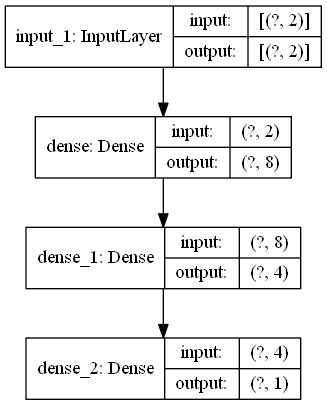

In [9]:
# Plot model graph
# you need to install pydot and graphviz via anaconda for this to work! restart notebook after installing these...
tf.keras.utils.plot_model(model, to_file='model.png', show_shapes=True, show_layer_names=True)

We can print the the actual score we have chosen and visualise the evolution of loss and accuracy over training epochs. 

7/7 - 0s - loss: 0.3282 - binary_accuracy: 0.8400
[0.32822930812835693, 0.8399999737739563]


<IPython.core.display.Javascript object>


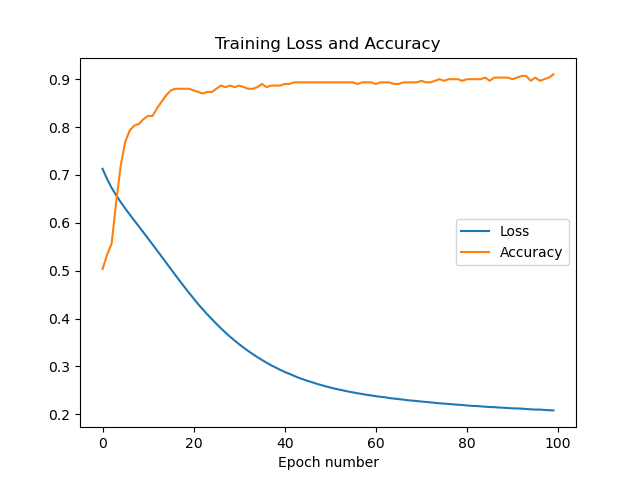

In [10]:
score = model.evaluate(Xmtest, ymtest, batch_size=16, verbose=2)
print(score)

#train_hist.history

plt.figure()
plt.plot(train_hist.history['loss'])
plt.plot(train_hist.history['binary_accuracy'])
plt.xlabel('Epoch number')
plt.title('Training Loss and Accuracy')
plt.legend(['Loss', 'Accuracy'], loc='center right')
plt.show()

Finally, we compute and display the [confusion matrix](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html). See also the [definition](https://en.wikipedia.org/wiki/Confusion_matrix). 

In [16]:
from sklearn.metrics import confusion_matrix

ympred = model.predict(Xmtest)
ympredbinary = (ympred > 0.5)

cm = confusion_matrix(ymtest, ympredbinary)

pd.DataFrame(cm, columns=["Pred 0", "Pred 1"], index=["True 0", "True 1"])

,Pred 0,Pred 1
True 0,42,9
True 1,5,44


We can use the nice new tool tensorboard to analyse our results! Note the _log_ directory in the folder where you have run your script.

In [9]:
%tensorboard --logdir logs

Reusing TensorBoard on port 6006 (pid 8256), started 0:01:06 ago. (Use '!kill 8256' to kill it.)

### Question 1.1 (9 pts)

Use the same two-moon data $(Xm,ym)$ given above for deriving the training and test sets. You can use the default ratio as done before or change it a bit, e.g. $0.3$. The range of data values is OK so you can skip data normalisation.

1. Try different DNN structures instead of (8, 4, 1). For example, you can use only one hidden layer or many more layers. You can also use different activation functions as long as you end up with a single node binary classifier.  Try also different optimisers and loss functions. Which one works best? Try, observe, and discuss!
2. For the best network you prefer, investigate the impact of training epochs and batch sizes on DNN performance. Measure performance in different ways using the [metrics from Keras](https://www.tensorflow.org/api_docs/python/tf/keras/metrics) or classical Machine Learning as discussed during ML lectures. You can use the same sklearn library functions as in WS2 to document performance (see e.g. above). Observe the difference between training and test set loss and accuracy. Interpret your results. What does a big difference between training and test set performance mean?
3. Try different [regularizers from Keras](https://www.tensorflow.org/api_docs/python/tf/keras/regularizers) to prevent over-fitting. Document your results and observations. 

_Some resources from the web, which may or may not be relevant:_

* [Measuring performance and basics](https://machinelearningmastery.com/evaluate-performance-deep-learning-models-keras/)
* [Weight constraints (different from regularisation)](https://machinelearningmastery.com/how-to-reduce-overfitting-in-deep-neural-networks-with-weight-constraints-in-keras/)
* [A nice example](https://heartbeat.fritz.ai/introduction-to-deep-learning-with-keras-c7c3d14e1527)

**Note that** we are now using Tensorflow 2 which integrates Keras. Therefore, you probably cannot copy paste old scripts from web!

**Answer as text here**\
Q1.1.1

In [17]:
np.random.seed(1009407)

def my_model(mymodel, opt=tf.keras.optimizers.SGD(), loss=tf.keras.losses.BinaryCrossentropy(), epochs=100,
             batch_size=16, display=False):
    mymodel.compile(optimizer=opt,
                    loss=loss,
                    metrics=[tf.keras.metrics.BinaryAccuracy()])
    print(mymodel.summary())
    train_hist = mymodel.fit(Xmtrain, ymtrain, epochs=epochs, batch_size=batch_size, verbose=0,
                             validation_data=(Xmtest, ymtest))
    score = mymodel.evaluate(Xmtest, ymtest, batch_size=batch_size, verbose=2)
    print(score)
    print('\n')
    if display:
        y_pred = np.rint(mymodel.predict(Xmtest))
        print(classification_report(ymtest, y_pred, digits=6))
        plt.figure()
        plt.plot(train_hist.history['loss'])
        plt.plot(train_hist.history['binary_accuracy'])
        plt.plot(train_hist.history['val_loss'])
        plt.plot(train_hist.history['val_binary_accuracy'])
        plt.xlabel('Epoch number')
        plt.title('Training Loss and Accuracy')
        plt.legend(['Loss', 'Accuracy', 'val_loss', 'val_accuracy'], loc='center right')
        plt.show()
    return score


Model: "841"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 8)                 24        
_________________________________________________________________
dense_10 (Dense)             (None, 4)                 36        
_________________________________________________________________
dense_11 (Dense)             (None, 1)                 5         
Total params: 65
Trainable params: 65
Non-trainable params: 0
_________________________________________________________________
None
7/7 - 0s - loss: 0.3436 - binary_accuracy: 0.8600
[0.3435729146003723, 0.8600000143051147]


Model: "16841"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_12 (Dense)             (None, 16)                48        
_________________________________________________________________
dense_13 (Dense)    

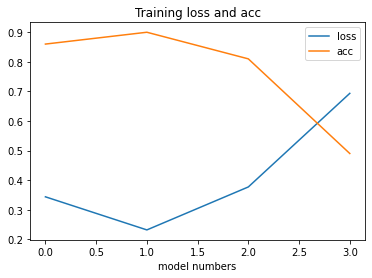

In [18]:
''' Answer as code here '''


# number of layers
model = Sequential(name='841')
model.add(tf.keras.Input(shape=(2,)))
model.add(Dense(8, activation='relu'))
model.add(Dense(4, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
a = np.zeros([4, 2])
a[0, :] = my_model(model)

model = Sequential(name='16841')
model.add(tf.keras.Input(shape=(2,)))
model.add(Dense(16, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(4, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
a[1, :] = my_model(model)

model = Sequential(name='41')
model.add(tf.keras.Input(shape=(2,)))
model.add(Dense(4, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
a[2, :] = my_model(model)

model = Sequential(name='8421')
model.add(tf.keras.Input(shape=(2,)))
model.add(Dense(8, activation='relu'))
model.add(Dense(4, activation='relu'))
model.add(Dense(2, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
a[3, :] = my_model(model)

plt.figure()
plt.plot(range(len(a)), a[:, 0], label='loss')
plt.plot(range(len(a)), a[:, 1], label='acc')
plt.xlabel('model numbers')
plt.title('Training loss and acc')
plt.legend()
plt.show()

We could find that the second model with 4 layers(16,8,4,1) has the best result. At the same time the computation time is longer for more layers and parameters.

Model: "sigmoid"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_22 (Dense)             (None, 16)                48        
_________________________________________________________________
dense_23 (Dense)             (None, 8)                 136       
_________________________________________________________________
dense_24 (Dense)             (None, 4)                 36        
_________________________________________________________________
dense_25 (Dense)             (None, 1)                 5         
Total params: 225
Trainable params: 225
Non-trainable params: 0
_________________________________________________________________
None
7/7 - 0s - loss: 0.2537 - binary_accuracy: 0.9000
[0.25370609760284424, 0.8999999761581421]


Model: "softmax"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_26 (D

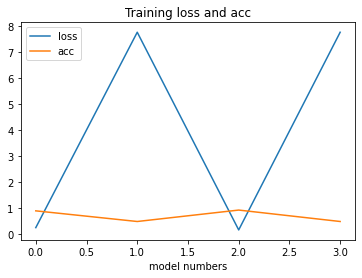

In [19]:
# different activation
model = Sequential(name='sigmoid')
model.add(tf.keras.Input(shape=(2,)))
model.add(Dense(16, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(4, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
a = np.zeros([4, 2])
a[0, :] = my_model(model)

model = Sequential(name='softmax')
model.add(tf.keras.Input(shape=(2,)))
model.add(Dense(16, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(4, activation='relu'))
model.add(Dense(1, activation='softmax'))
a[1, :] = my_model(model)

model = Sequential(name='tanh')
model.add(tf.keras.Input(shape=(2,)))
model.add(Dense(16, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(4, activation='relu'))
model.add(Dense(1, activation='tanh'))
a[2, :] = my_model(model)

model = Sequential(name='selu')
model.add(tf.keras.Input(shape=(2,)))
model.add(Dense(16, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(4, activation='relu'))
model.add(Dense(1, activation='selu'))
a[3, :] = my_model(model)

plt.figure()
plt.plot(range(len(a)), a[:, 0], label='loss')
plt.plot(range(len(a)), a[:, 1], label='acc')
plt.xlabel('model numbers')
plt.title('Training loss and acc')
plt.legend()
plt.show()

 I tried different activiation function on the last layer. I think the original setting, which contains three 'relu' activations and one 'sigmoid', has the best performance. 'softmax' never have a good prediction. Sometimes the 'tanh' or 'selu' layer could get a better result, but sometime they made mistakes, same as 'softmax'. This means they are not satble enough.

Model: "Sgd"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_38 (Dense)             (None, 16)                48        
_________________________________________________________________
dense_39 (Dense)             (None, 8)                 136       
_________________________________________________________________
dense_40 (Dense)             (None, 4)                 36        
_________________________________________________________________
dense_41 (Dense)             (None, 1)                 5         
Total params: 225
Trainable params: 225
Non-trainable params: 0
_________________________________________________________________
None
7/7 - 0s - loss: 0.3867 - binary_accuracy: 0.8500
[0.3867160677909851, 0.8500000238418579]


Model: "Adadelta"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_42 (Dense

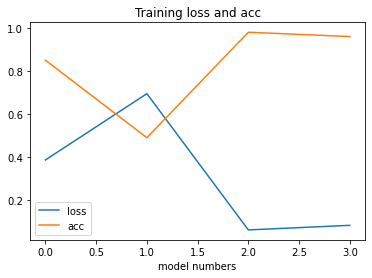

In [20]:
#different optimisers
model = Sequential(name='Sgd')
model.add(tf.keras.Input(shape=(2,)))
model.add(Dense(16, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(4, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
a = np.zeros([4, 2])
a[0, :] = my_model(model)

model = Sequential(name='Adadelta')
model.add(tf.keras.Input(shape=(2,)))
model.add(Dense(16, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(4, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
a[1, :] = my_model(model, opt=tf.keras.optimizers.Adadelta())

model = Sequential(name='Adam')
model.add(tf.keras.Input(shape=(2,)))
model.add(Dense(16, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(4, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
a[2, :] = my_model(model, opt=tf.keras.optimizers.Adam())

model = Sequential(name='RMSprop')
model.add(tf.keras.Input(shape=(2,)))
model.add(Dense(16, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(4, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
a[3, :] = my_model(model, opt=tf.keras.optimizers.RMSprop())

plt.figure()
plt.plot(range(len(a)), a[:, 0], label='loss')
plt.plot(range(len(a)), a[:, 1], label='acc')
plt.xlabel('model numbers')
plt.title('Training loss and acc')
plt.legend()
plt.show()

From the plot, we could find the third model has the best result, which is using 'Adam' as the optmizer.

Model: "BinaryCrossentropy"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_54 (Dense)             (None, 16)                48        
_________________________________________________________________
dense_55 (Dense)             (None, 8)                 136       
_________________________________________________________________
dense_56 (Dense)             (None, 4)                 36        
_________________________________________________________________
dense_57 (Dense)             (None, 1)                 5         
Total params: 225
Trainable params: 225
Non-trainable params: 0
_________________________________________________________________
None
7/7 - 0s - loss: 0.1095 - binary_accuracy: 0.9500
[0.10953173041343689, 0.949999988079071]


Model: "CategoricalCrossentropy"
_________________________________________________________________
Layer (type)                 Output Shape          

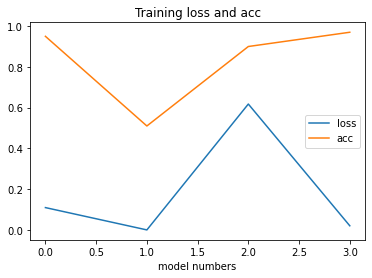

In [21]:
#different loss function
model = Sequential(name='BinaryCrossentropy')
model.add(tf.keras.Input(shape=(2,)))
model.add(Dense(16, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(4, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
a = np.zeros([4, 2])
a[0, :] = my_model(model, opt=tf.keras.optimizers.Adam())

model = Sequential(name='CategoricalCrossentropy')
model.add(tf.keras.Input(shape=(2,)))
model.add(Dense(16, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(4, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
a[1, :] = my_model(model, opt=tf.keras.optimizers.Adam(), loss=tf.keras.losses.CategoricalCrossentropy())

model = Sequential(name='Hinge')
model.add(tf.keras.Input(shape=(2,)))
model.add(Dense(16, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(4, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
a[2, :] = my_model(model, opt=tf.keras.optimizers.Adam(), loss=tf.keras.losses.Hinge())

model = Sequential(name='LogCosh')
model.add(tf.keras.Input(shape=(2,)))
model.add(Dense(16, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(4, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
a[3, :] = my_model(model, opt=tf.keras.optimizers.Adam(), loss=tf.keras.losses.LogCosh())

plt.figure()
plt.plot(range(len(a)), a[:, 0], label='loss')
plt.plot(range(len(a)), a[:, 1], label='acc')
plt.xlabel('model numbers')
plt.title('Training loss and acc')
plt.legend()
plt.show()

By changing the loss function, we test three addtional models. And we could find LogCosh enjoys the least losses and highest accuracy.

Summary:
We will choose 4 layers (16,8,4,1), whose first three are 'relu' and the last one is 'sigmoid'. 
We are going to use Adam as optimizer and LogCosh as loss function.

Q1.1.2

Model: "50_epochs"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_70 (Dense)             (None, 16)                48        
_________________________________________________________________
dense_71 (Dense)             (None, 8)                 136       
_________________________________________________________________
dense_72 (Dense)             (None, 4)                 36        
_________________________________________________________________
dense_73 (Dense)             (None, 1)                 5         
Total params: 225
Trainable params: 225
Non-trainable params: 0
_________________________________________________________________
None
7/7 - 0s - loss: 0.0478 - binary_accuracy: 0.8600
[0.04781012609601021, 0.8600000143051147]


              precision    recall  f1-score   support

           0   0.893617  0.823529  0.857143        51
           1   0.830189  0.897959  0.862745      

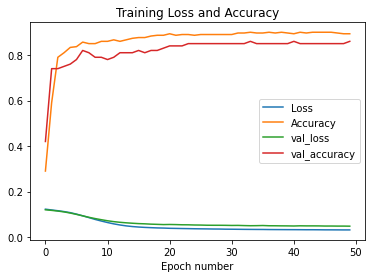

Model: "100_epochs"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_74 (Dense)             (None, 16)                48        
_________________________________________________________________
dense_75 (Dense)             (None, 8)                 136       
_________________________________________________________________
dense_76 (Dense)             (None, 4)                 36        
_________________________________________________________________
dense_77 (Dense)             (None, 1)                 5         
Total params: 225
Trainable params: 225
Non-trainable params: 0
_________________________________________________________________
None
7/7 - 0s - loss: 0.0165 - binary_accuracy: 0.9800
[0.01650826260447502, 0.9800000190734863]


              precision    recall  f1-score   support

           0   0.980392  0.980392  0.980392        51
           1   0.979592  0.979592  0.979592     

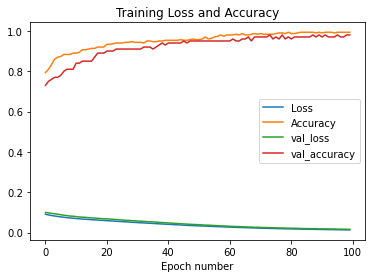

Model: "200_epochs"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_78 (Dense)             (None, 16)                48        
_________________________________________________________________
dense_79 (Dense)             (None, 8)                 136       
_________________________________________________________________
dense_80 (Dense)             (None, 4)                 36        
_________________________________________________________________
dense_81 (Dense)             (None, 1)                 5         
Total params: 225
Trainable params: 225
Non-trainable params: 0
_________________________________________________________________
None
7/7 - 0s - loss: 0.0088 - binary_accuracy: 0.9800
[0.008754550479352474, 0.9800000190734863]


              precision    recall  f1-score   support

           0   0.980392  0.980392  0.980392        51
           1   0.979592  0.979592  0.979592    

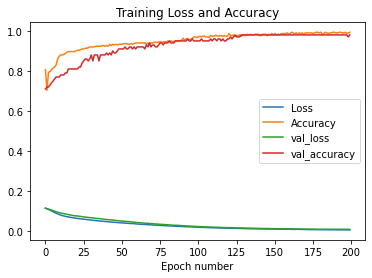

Model: "500_epochs"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_82 (Dense)             (None, 16)                48        
_________________________________________________________________
dense_83 (Dense)             (None, 8)                 136       
_________________________________________________________________
dense_84 (Dense)             (None, 4)                 36        
_________________________________________________________________
dense_85 (Dense)             (None, 1)                 5         
Total params: 225
Trainable params: 225
Non-trainable params: 0
_________________________________________________________________
None
7/7 - 0s - loss: 0.0054 - binary_accuracy: 0.9800
[0.005441918503493071, 0.9800000190734863]


              precision    recall  f1-score   support

           0   0.980392  0.980392  0.980392        51
           1   0.979592  0.979592  0.979592    

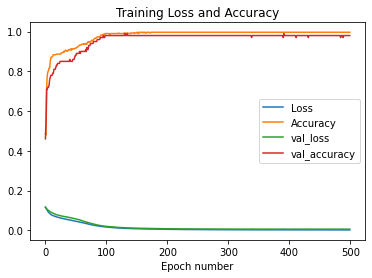

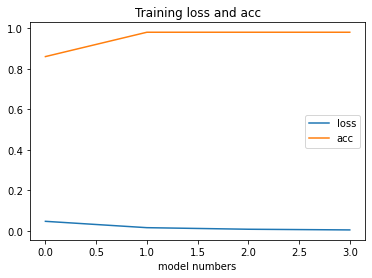

In [22]:
#different epochs
from sklearn.metrics import classification_report

model = Sequential(name='50_epochs')
model.add(tf.keras.Input(shape=(2,)))
model.add(Dense(16, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(4, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
a = np.zeros([4, 2])
a[0, :] = my_model(model, opt=tf.keras.optimizers.Adam(), loss=tf.keras.losses.LogCosh(), epochs=50, display=True)

model = Sequential(name='100_epochs')
model.add(tf.keras.Input(shape=(2,)))
model.add(Dense(16, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(4, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
a[1, :] = my_model(model, opt=tf.keras.optimizers.Adam(), loss=tf.keras.losses.LogCosh(), display=True)

model = Sequential(name='200_epochs')
model.add(tf.keras.Input(shape=(2,)))
model.add(Dense(16, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(4, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
a[2, :] = my_model(model, opt=tf.keras.optimizers.Adam(), loss=tf.keras.losses.LogCosh(), epochs=200, display=True)

model = Sequential(name='500_epochs')
model.add(tf.keras.Input(shape=(2,)))
model.add(Dense(16, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(4, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
a[3, :] = my_model(model, opt=tf.keras.optimizers.Adam(), loss=tf.keras.losses.LogCosh(), epochs=500, display=True)

plt.figure()
plt.plot(range(len(a)), a[:, 0], label='loss')
plt.plot(range(len(a)), a[:, 1], label='acc')
plt.xlabel('model numbers')
plt.title('Training loss and acc')
plt.legend()
plt.show()


With the epochs increasing from 0 to 120, the training accuracy increase apparently . But from the validation metrics, we could find fluctuations in the 500 epochs one. In this case, we could say it suffers from the overfitting.

Model: "batch_size_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_385 (Dense)            (None, 16)                48        
_________________________________________________________________
dense_386 (Dense)            (None, 8)                 136       
_________________________________________________________________
dense_387 (Dense)            (None, 4)                 36        
_________________________________________________________________
dense_388 (Dense)            (None, 1)                 5         
Total params: 225
Trainable params: 225
Non-trainable params: 0
_________________________________________________________________
None
13/13 - 0s - loss: 0.0052 - binary_accuracy: 0.9900
[0.005248634610325098, 0.9900000095367432]


              precision    recall  f1-score   support

           0   0.980769  1.000000  0.990291        51
           1   1.000000  0.979592  0.989691

<IPython.core.display.Javascript object>


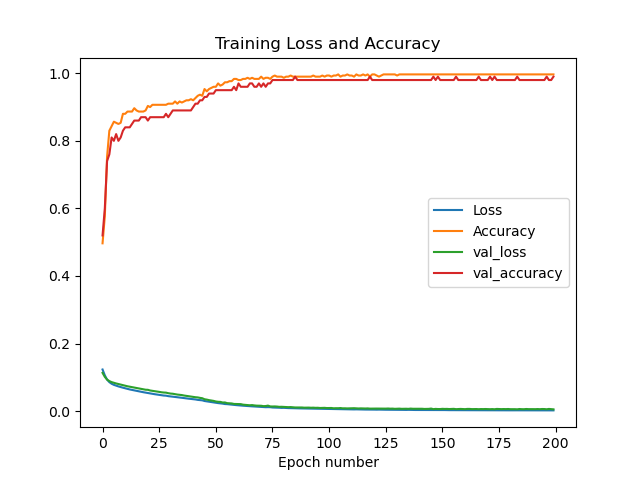

Model: "batch_size_16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_389 (Dense)            (None, 16)                48        
_________________________________________________________________
dense_390 (Dense)            (None, 8)                 136       
_________________________________________________________________
dense_391 (Dense)            (None, 4)                 36        
_________________________________________________________________
dense_392 (Dense)            (None, 1)                 5         
Total params: 225
Trainable params: 225
Non-trainable params: 0
_________________________________________________________________
None
7/7 - 0s - loss: 0.0050 - binary_accuracy: 0.9800
[0.004991207271814346, 0.9800000190734863]


              precision    recall  f1-score   support

           0   0.980392  0.980392  0.980392        51
           1   0.979592  0.979592  0.979592 

<IPython.core.display.Javascript object>


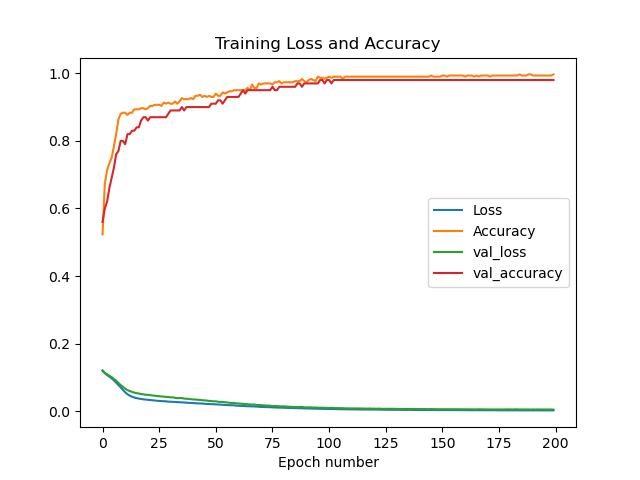

Model: "batch_size_32"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_393 (Dense)            (None, 16)                48        
_________________________________________________________________
dense_394 (Dense)            (None, 8)                 136       
_________________________________________________________________
dense_395 (Dense)            (None, 4)                 36        
_________________________________________________________________
dense_396 (Dense)            (None, 1)                 5         
Total params: 225
Trainable params: 225
Non-trainable params: 0
_________________________________________________________________
None
4/4 - 0s - loss: 0.0136 - binary_accuracy: 0.9900
[0.013612935319542885, 0.9900000095367432]


              precision    recall  f1-score   support

           0   0.980769  1.000000  0.990291        51
           1   1.000000  0.979592  0.989691 

<IPython.core.display.Javascript object>


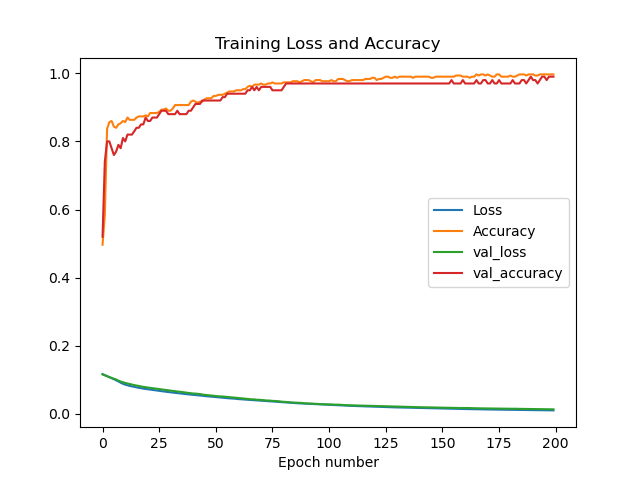

Model: "batch_size_64"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_397 (Dense)            (None, 16)                48        
_________________________________________________________________
dense_398 (Dense)            (None, 8)                 136       
_________________________________________________________________
dense_399 (Dense)            (None, 4)                 36        
_________________________________________________________________
dense_400 (Dense)            (None, 1)                 5         
Total params: 225
Trainable params: 225
Non-trainable params: 0
_________________________________________________________________
None
2/2 - 0s - loss: 0.0102 - binary_accuracy: 0.9800
[0.01021396741271019, 0.9800000190734863]


              precision    recall  f1-score   support

           0   0.980392  0.980392  0.980392        51
           1   0.979592  0.979592  0.979592  

<IPython.core.display.Javascript object>


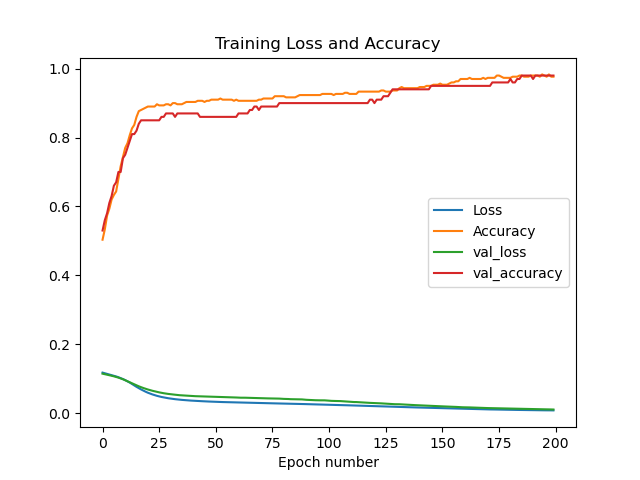

<IPython.core.display.Javascript object>


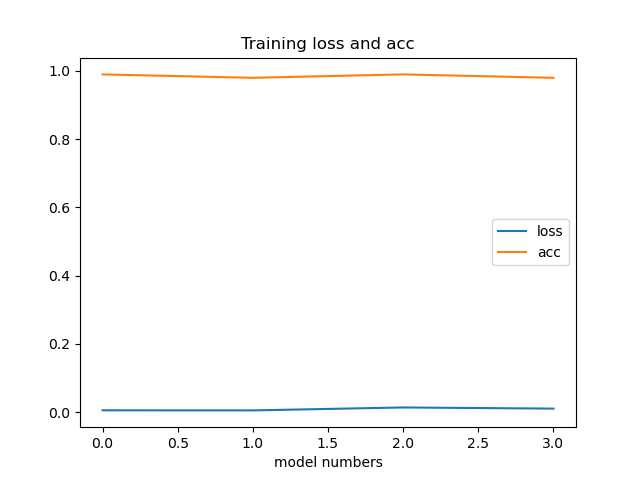

In [54]:
# different batch size
model = Sequential(name='batch_size_8')
model.add(tf.keras.Input(shape=(2,)))
model.add(Dense(16, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(4, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
a = np.zeros([4, 2])
a[0, :] = my_model(model, opt=tf.keras.optimizers.Adam(), loss=tf.keras.losses.LogCosh(), epochs=200, batch_size=8, display=True)

model = Sequential(name='batch_size_16')
model.add(tf.keras.Input(shape=(2,)))
model.add(Dense(16, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(4, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
a[1, :] = my_model(model, opt=tf.keras.optimizers.Adam(), loss=tf.keras.losses.LogCosh(), epochs=200, display=True)

model = Sequential(name='batch_size_32')
model.add(tf.keras.Input(shape=(2,)))
model.add(Dense(16, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(4, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
a[2, :] = my_model(model, opt=tf.keras.optimizers.Adam(), loss=tf.keras.losses.LogCosh(), epochs=200, batch_size=32, display=True)

model = Sequential(name='batch_size_64')
model.add(tf.keras.Input(shape=(2,)))
model.add(Dense(16, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(4, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
a[3, :] = my_model(model, opt=tf.keras.optimizers.Adam(), loss=tf.keras.losses.LogCosh(), epochs=200, batch_size=64, display=True)

plt.figure()
plt.plot(range(len(a)), a[:, 0], label='loss')
plt.plot(range(len(a)), a[:, 1], label='acc')
plt.xlabel('model numbers')
plt.title('Training loss and acc')
plt.legend()
plt.show()

From the chart we could find the influence of batch size is similar with epoch numbers. The increase of batch size could smoth the val_accuarcy. However, after the batch size reaches 32, the model may suffer from overfitting, which shows as the fluctuation. 

Q1.1.3

Model: "l1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_86 (Dense)             (None, 16)                48        
_________________________________________________________________
dense_87 (Dense)             (None, 8)                 136       
_________________________________________________________________
dense_88 (Dense)             (None, 4)                 36        
_________________________________________________________________
dense_89 (Dense)             (None, 1)                 5         
Total params: 225
Trainable params: 225
Non-trainable params: 0
_________________________________________________________________
None
7/7 - 0s - loss: 0.0070 - binary_accuracy: 0.9800
[0.0069514792412519455, 0.9800000190734863]


              precision    recall  f1-score   support

           0   0.980392  0.980392  0.980392        51
           1   0.979592  0.979592  0.979592        49


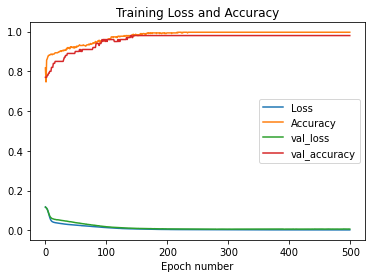

Model: "l2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_90 (Dense)             (None, 16)                48        
_________________________________________________________________
dense_91 (Dense)             (None, 8)                 136       
_________________________________________________________________
dense_92 (Dense)             (None, 4)                 36        
_________________________________________________________________
dense_93 (Dense)             (None, 1)                 5         
Total params: 225
Trainable params: 225
Non-trainable params: 0
_________________________________________________________________
None
7/7 - 0s - loss: 0.0055 - binary_accuracy: 0.9800
[0.005493233911693096, 0.9800000190734863]


              precision    recall  f1-score   support

           0   0.980392  0.980392  0.980392        51
           1   0.979592  0.979592  0.979592        49



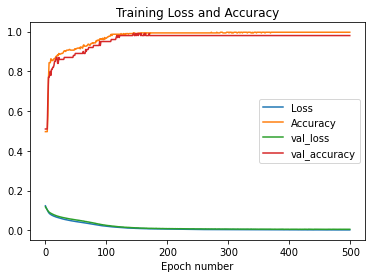

Model: "l1l2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_94 (Dense)             (None, 16)                48        
_________________________________________________________________
dense_95 (Dense)             (None, 8)                 136       
_________________________________________________________________
dense_96 (Dense)             (None, 4)                 36        
_________________________________________________________________
dense_97 (Dense)             (None, 1)                 5         
Total params: 225
Trainable params: 225
Non-trainable params: 0
_________________________________________________________________
None
7/7 - 0s - loss: 0.0060 - binary_accuracy: 0.9800
[0.005978214088827372, 0.9800000190734863]


              precision    recall  f1-score   support

           0   0.980392  0.980392  0.980392        51
           1   0.979592  0.979592  0.979592        49

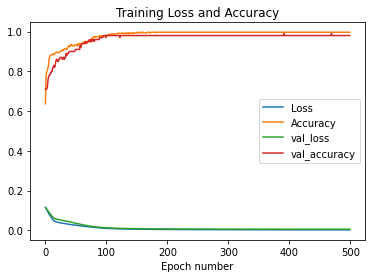

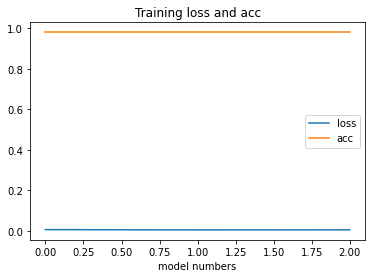

In [26]:
a = np.zeros([3, 2])
model = Sequential(name='l1')
model.add(tf.keras.Input(shape=(2,)))
model.add(Dense(16, activation='relu', activity_regularizer=regularizers.l1(1e-4)))
model.add(Dense(8, activation='relu', activity_regularizer=regularizers.l1(1e-4)))
model.add(Dense(4, activation='relu', activity_regularizer=regularizers.l1(1e-4)))
model.add(Dense(1, activation='sigmoid', activity_regularizer=regularizers.l1(1e-4)))
a[0, :] = my_model(model, opt=tf.keras.optimizers.Adam(), loss=tf.keras.losses.LogCosh(), epochs=500, display=True)

model = Sequential(name='l2')
model.add(tf.keras.Input(shape=(2,)))
model.add(Dense(16, activation='relu', activity_regularizer=regularizers.l2(1e-4)))
model.add(Dense(8, activation='relu', activity_regularizer=regularizers.l2(1e-4)))
model.add(Dense(4, activation='relu', activity_regularizer=regularizers.l2(1e-4)))
model.add(Dense(1, activation='sigmoid', activity_regularizer=regularizers.l2(1e-4)))
a[1, :] = my_model(model, opt=tf.keras.optimizers.Adam(), loss=tf.keras.losses.LogCosh(), epochs=500, display=True)

model = Sequential(name='l1l2')
model.add(tf.keras.Input(shape=(2,)))
model.add(Dense(16, activation='relu', activity_regularizer=regularizers.l1_l2(l1=1e-4, l2=1e-4)))
model.add(Dense(8, activation='relu', activity_regularizer=regularizers.l1_l2(l1=1e-4, l2=1e-4)))
model.add(Dense(4, activation='relu', activity_regularizer=regularizers.l1_l2(l1=1e-4, l2=1e-4)))
model.add(Dense(1, activation='sigmoid', activity_regularizer=regularizers.l1_l2(l1=1e-4, l2=1e-4)))
a[2, :] = my_model(model, opt=tf.keras.optimizers.Adam(), loss=tf.keras.losses.LogCosh(), epochs=500, display=True)

plt.figure()
plt.plot(range(len(a)), a[:, 0], label='loss')
plt.plot(range(len(a)), a[:, 1], label='acc')
plt.xlabel('model numbers')
plt.title('Training loss and acc')
plt.legend()
plt.show()

We could find three different get the same socre. Both 'l1' and  'l2' regularizers could reduce the fluctuation, which is the representation of overfitting.

### Question 1.2 (6 pts) Wireless Indoor Localization _revisited_

We now revisit the wireless indoor localisation [dataset](http://archive.ics.uci.edu/ml/datasets/Wireless+Indoor+Localization) from WS2. Remember that the data shows the recorded signal strength from 7 different base stations at a smart phone. The phone is in one of the four rooms {1, 2, 3, 4}. The goal is to classify the location of the phone to one of the four rooms.

1. Solve this classification problem with a DNN. Determine appropriate input and output layers and experiment with different number/structures of hidden layers. _Hint: you can use, e.g., two sigmoid outputs to binary encode four classes._
2. Measure performance in different ways using the metrics from Keras or classical Machine Learning as discussed during ML lectures. You can use the same sklearn library functions as in WS2 to document performance. Discuss your findings.

In [23]:
dataw = pd.read_csv('files/wifi_localization.csv', names=[f"s{i}" for i in range(1, 8)] + ['Room Number'])
dataw.head() # comment one to see the other
dataw.tail()

,s1,s2,s3,s4,s5,s6,s7,Room Number
1995,-59,-59,-48,-66,-50,-86,-94,4
1996,-59,-56,-50,-62,-47,-87,-90,4
1997,-62,-59,-46,-65,-45,-87,-88,4
1998,-62,-58,-52,-61,-41,-90,-85,4
1999,-59,-50,-45,-60,-45,-88,-87,4


In [24]:
print(dataw.size, dataw.shape)

16000 (2000, 8)


In [25]:
SRI = dataw.iloc[:,:7]
# a.shape
loc = dataw.iloc[:,7]-1 
# loc.shape

# split into training and test sets
SRItrain, SRItest, loctrain, loctest = train_test_split(SRI, loc)

**Answer as text here**
Q1.2.1 & Q1.2.2

Model: "102"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_112 (Dense)            (None, 10)                80        
_________________________________________________________________
dense_113 (Dense)            (None, 2)                 22        
Total params: 102
Trainable params: 102
Non-trainable params: 0
_________________________________________________________________
None
32/32 - 0s - loss: 0.0960 - binary_accuracy: 0.9760
[0.0960327759385109, 0.9760000109672546]


              precision    recall  f1-score   support

           0   0.978541  0.962025  0.970213       237
           1   0.980469  0.980469  0.980469       256

   micro avg   0.979550  0.971602  0.975560       493
   macro avg   0.979505  0.971247  0.975341       493
weighted avg   0.979542  0.971602  0.975538       493
 samples avg   0.730000  0.734000  0.730667       493



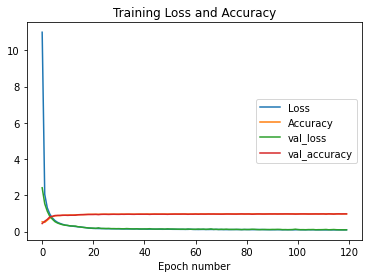

Model: "16842"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_114 (Dense)            (None, 16)                128       
_________________________________________________________________
dense_115 (Dense)            (None, 8)                 136       
_________________________________________________________________
dense_116 (Dense)            (None, 4)                 36        
_________________________________________________________________
dense_117 (Dense)            (None, 2)                 10        
Total params: 310
Trainable params: 310
Non-trainable params: 0
_________________________________________________________________
None
32/32 - 0s - loss: 0.0907 - binary_accuracy: 0.9750
[0.09067902714014053, 0.9750000238418579]


              precision    recall  f1-score   support

           0   0.991228  0.953586  0.972043       237
           1   0.962121  0.992188  0.976923       2

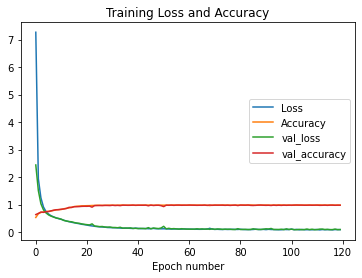

Model: "42"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_118 (Dense)            (None, 4)                 32        
_________________________________________________________________
dense_119 (Dense)            (None, 2)                 10        
Total params: 42
Trainable params: 42
Non-trainable params: 0
_________________________________________________________________
None
32/32 - 0s - loss: 0.1890 - binary_accuracy: 0.9440
[0.1890191286802292, 0.9440000057220459]


              precision    recall  f1-score   support

           0   0.946502  0.970464  0.958333       237
           1   0.958333  0.898438  0.927419       256

   micro avg   0.952381  0.933063  0.942623       493
   macro avg   0.952418  0.934451  0.942876       493
weighted avg   0.952646  0.933063  0.942281       493
 samples avg   0.682000  0.696000  0.686000       493



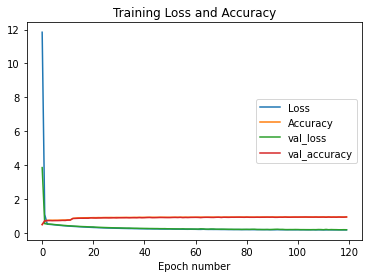

Model: "321682"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_120 (Dense)            (None, 32)                256       
_________________________________________________________________
dense_121 (Dense)            (None, 16)                528       
_________________________________________________________________
dense_122 (Dense)            (None, 8)                 136       
_________________________________________________________________
dense_123 (Dense)            (None, 2)                 18        
Total params: 938
Trainable params: 938
Non-trainable params: 0
_________________________________________________________________
None
32/32 - 0s - loss: 0.0767 - binary_accuracy: 0.9820
[0.07669251412153244, 0.9819999933242798]


              precision    recall  f1-score   support

           0   0.987179  0.974684  0.980892       237
           1   0.980545  0.984375  0.982456       

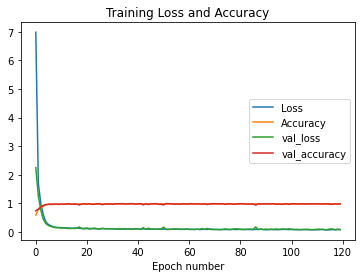

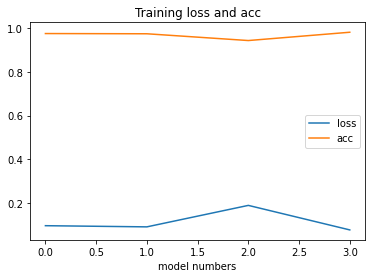

In [31]:
from pandas import DataFrame

loctest_binary = np.zeros([len(loctest), 3])
loctest_binary[:, 0] = loctest.index.tolist()
loctrain_binary = np.zeros([len(loctrain), 3])
loctrain_binary[:, 0] = loctrain.index.tolist()
loctest_list = loctest.tolist()
loctrain_list = loctrain.tolist()
for i in range(len(loctest)):
    if loctest_list[i] == 1:
        loctest_binary[i, 1] = 1
    if loctest_list[i] == 2:
        loctest_binary[i, 2] = 1
    if loctest_list[i] == 3:
        loctest_binary[i, 1] = 1
        loctest_binary[i, 2] = 1
for i in range(len(loctrain)):
    if loctrain_list[i] == 1:
        loctrain_binary[i, 1] = 1
    if loctrain_list[i] == 2:
        loctrain_binary[i, 2] = 1
    if loctrain_list[i] == 3:
        loctrain_binary[i, 1] = 1
        loctrain_binary[i, 2] = 1
loctrain_binary = loctrain_binary.astype(int)
loctest_binary = loctest_binary.astype(int)
loctrain2 = DataFrame(loctrain_binary[:, 1:3], index=[loctrain_binary[:, 0]], columns=['0', '1'])
loctest2 = DataFrame(loctest_binary[:, 1:3], index=[loctest_binary[:, 0]], columns=['0', '1'])


def my_model(mymodel, opt='adam', loss=tf.keras.losses.BinaryCrossentropy(), epochs=120,
             batch_size=16, display=False):
    mymodel.compile(optimizer=opt,
                    loss=loss,
                    metrics=[tf.keras.metrics.BinaryAccuracy()])
    print(mymodel.summary())
    train_hist = mymodel.fit(SRItrain, loctrain2, epochs=epochs, batch_size=batch_size, verbose=0,
                             validation_data=(SRItest, loctest2))
    score = mymodel.evaluate(SRItest, loctest2, batch_size=batch_size, verbose=2)
    print(score)
    print('\n')
    if display:
        y_pred = np.rint(mymodel.predict(SRItest))
        print(classification_report(loctest2, y_pred, digits=6))
        plt.figure()
        plt.plot(train_hist.history['loss'])
        plt.plot(train_hist.history['binary_accuracy'])
        plt.plot(train_hist.history['val_loss'])
        plt.plot(train_hist.history['val_binary_accuracy'])
        plt.xlabel('Epoch number')
        plt.title('Training Loss and Accuracy')
        plt.legend(['Loss', 'Accuracy', 'val_loss', 'val_accuracy'], loc='center right')
        plt.show()
    return score


# number of layers
model = Sequential(name='102')
model.add(tf.keras.Input(shape=(7,)))
model.add(Dense(10, activation='relu', activity_regularizer=regularizers.l2(1e-4)))
model.add(Dense(2, activation='sigmoid', activity_regularizer=regularizers.l2(1e-4)))
a = np.zeros([4, 2])
a[0, :] = my_model(model, display='True')

model = Sequential(name='16842')
model.add(tf.keras.Input(shape=(7,)))
model.add(Dense(16, activation='relu', activity_regularizer=regularizers.l2(1e-4)))
model.add(Dense(8, activation='relu', activity_regularizer=regularizers.l2(1e-4)))
model.add(Dense(4, activation='relu', activity_regularizer=regularizers.l2(1e-4)))
model.add(Dense(2, activation='sigmoid', activity_regularizer=regularizers.l2(1e-4)))
a[1, :] = my_model(model, display='True')

model = Sequential(name='42')
model.add(tf.keras.Input(shape=(7,)))
model.add(Dense(4, activation='relu', activity_regularizer=regularizers.l2(1e-4)))
model.add(Dense(2, activation='sigmoid', activity_regularizer=regularizers.l2(1e-4)))
a[2, :] = my_model(model, display='True')

model = Sequential(name='321682')
model.add(tf.keras.Input(shape=(7,)))
model.add(Dense(32, activation='relu', activity_regularizer=regularizers.l2(1e-4)))
model.add(Dense(16, activation='relu', activity_regularizer=regularizers.l2(1e-4)))
model.add(Dense(8, activation='relu', activity_regularizer=regularizers.l2(1e-4)))
model.add(Dense(2, activation='sigmoid', activity_regularizer=regularizers.l2(1e-4)))
a[3, :] = my_model(model, display='True')

plt.figure()
plt.plot(range(len(a)), a[:, 0], label='loss')
plt.plot(range(len(a)), a[:, 1], label='acc')
plt.xlabel('model numbers')
plt.title('Training loss and acc')
plt.legend()
plt.show()


From the figure we could find the 4 layers with '16-8-4-2' parameters model get the best result, no matter in precision or recall. We could also find there is no fluctuation.

# Section 2: Time Series Estimation

We will next use household electrical power demand as an interesting time-series, which is relevant to power systems and electrical engineering.

## Electrical Power Household Demand Estimation


Estimating household power consumption is an important problem in power systems. The demand estimation is easy at the state or regional level due to low-pass filtering (or law of large numbers) effect of adding thousands or even millions customers' demand. The problem is much more challenging when the demand of individual houses are studied. It is almost impossible to predict when someone is going to boil water in the kettle or take a shower at home. However, it is still possible to make good estimates.

We are given the yearly power consumption of two houses.

In [3]:
raw_data = pd.read_csv('files/two_houses.csv')
raw_data.head()

,day,time,house1,house2
0,0,SMAPV3001,0.288,0.150
1,0,SMAPV3002,0.394,0.081
2,0,SMAPV3003,0.238,0.094
3,0,SMAPV3004,0.138,0.081
4,0,SMAPV3005,0.094,0.075


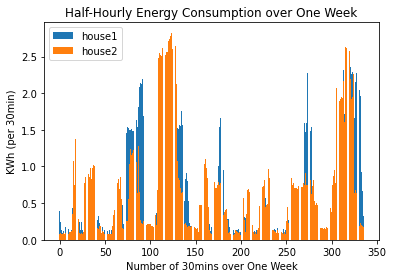

((17567,), (17567,))

In [4]:
house1 = raw_data.iloc[1:,2]
house2 = raw_data.iloc[1:,3]

plt.figure()
plt.bar(np.arange(48*7),house1[0:48*7])
plt.bar(np.arange(48*7),house2[0:48*7])
plt.title('Half-Hourly Energy Consumption over One Week')
plt.xlabel('Number of 30mins over One Week')
plt.ylabel('KWh (per 30min)')
plt.legend(['house1','house2'])
plt.show()

house1.shape, house2.shape

### Question 2.1 (8 pts) Time Series Estimation using ARMA Models

Use ARMA linear estimation method to estimate the power consumption of house 1 and house 2. You can use [statsmodel time series analysis tools](https://www.statsmodels.org/stable/tsa.html) for this. 

1. Define and fit an ARMA model for the first 960 data points. Next, forecast the next 48 points. Measure your performance, e.g. in terms of Mean-squared Error (MSE) using [statsmodels tools](https://www.statsmodels.org/stable/tools.html#measure-for-fit-performance-eval-measures), and plot results.
2. Try different AR and MA degrees and different data/time windows. Document and discuss your observations.

_Hints_: see [ARIMA model](https://www.statsmodels.org/stable/generated/statsmodels.tsa.arima_model.ARIMA.html), [ARIMA results](https://www.statsmodels.org/stable/generated/statsmodels.tsa.arima_model.ARMAResults.html), and [ARIMA example](https://www.statsmodels.org/stable/examples/notebooks/generated/tsa_arma_1.html)

This is an [alternative example implementation.](https://machinelearningmastery.com/arima-for-time-series-forecasting-with-python/)

**Pointers for solution**

* Use ARIMA model with order (p, 0, q) for implementing a pure ARMA model. [ARIMA](https://otexts.com/fpp2/arima.html) differs from ARMA. 
* Specific commands to use are [ARIMA](https://www.statsmodels.org/stable/generated/statsmodels.tsa.arima_model.ARIMA.html) for creating the model and [ARIMA.fit](https://www.statsmodels.org/stable/generated/statsmodels.tsa.arima_model.ARIMA.fit.html) with appropriate arguments as documented.
* After training, [ARIMAResults](https://www.statsmodels.org/stable/generated/statsmodels.tsa.arima_model.ARIMAResults.html) functions such as _summary()_ , _fittedvalues_, _params_, and _forecast(steps=nbrsteps)_ will be very useful.

In [6]:
from statsmodels.tsa.arima_model import ARIMA

**Answer as text here**
Q2.1.1

In [34]:
''' Answer as code here '''
from sklearn.metrics import mean_squared_error
import statsmodels.api as sm

train1 = house1[0:960]
test1 = house1[960:1008]
train2 = house2[0:960]
test2 = house2[960:1008]


In [44]:
[p1, q1] = sm.tsa.stattools.arma_order_select_ic(train1, max_ar=5, max_ma=3, ic='aic')['aic_min_order']
print(p1, q1)
[p2, q2] = sm.tsa.stattools.arma_order_select_ic(train2, max_ar=5, max_ma=3, ic='aic')['aic_min_order']
print(p2, q2)

5 2
5 3


Test MSE: 0.104


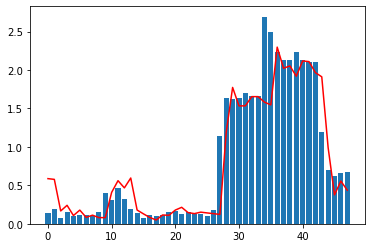

In [45]:
predictions1 = list()
for t in range(int(len(test1) / 2)):
    model = ARIMA(train1, order=(5, 0, 2))
    model_fit = model.fit(disp=-1)
    output = model_fit.forecast(steps=2)
    yhat = output[0]
    predictions1 = np.append(predictions1, yhat)
    obs = test1[2 * t:2 * t + 2]
    train1 = np.append(train1, obs)

error = mean_squared_error(test1, predictions1)
print('Test MSE: %.3f' % error)
# plot
plt.figure()
plt.bar(np.arange(48), test1)
plt.plot(np.arange(48), predictions1,color='red')
plt.show()

Test MSE: 0.000


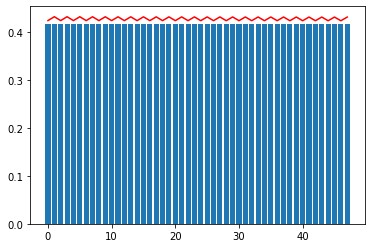

In [47]:
predictions2 = list()
for t in range(int(len(test2) / 2)):
    model = ARIMA(train2, order=(1, 0, 3))
    model_fit = model.fit(disp=-1)
    output = model_fit.forecast(steps=2)
    yhat = output[0]
    predictions2 = np.append(predictions2, yhat)
    obs = test2[2 * t:2 * t + 2]
    train2 = np.append(train2, obs)

error = mean_squared_error(test2, predictions2)
print('Test MSE: %.3f' % error)
# plot
plt.figure()
plt.bar(np.arange(48), test2)
plt.plot(np.arange(48), predictions2,color='red')
plt.show()

In this part of question, I use the arma_order_select_ic to decide the order of p and q by aic,and the d parameter should be 0 for a ARMA model. At the very beginning, I tried to use ACF and PACF plot to decide p and q, however, it is said that the data are from an ARIMA(p,d,0) or ARIMA(0,d,q) model, then the ACF and PACF plots can be helpful in determining the value of p or q.\
From the result, we choose p=5 and q=2 for the first train set. Then I forcast the future data with a rolling forecast scheme, which will forcast the data for 1 hour each time to reduce the time cost.(if step is 1, the program will run for a really long time). And the results MSE is 0.104 .\
For the house2, we could not apply the p=5,q=3 model, since it not stationary.In this case, I applie p=1,q=3model to fix this problem. And the mse is 0. We could find that the original test arry keeps 0.417, and our prediction shows a similar result.\
And we are going to use the data in house1 for next question.\
\
Q2.1.2

For p= 1
Test MSE: 0.110


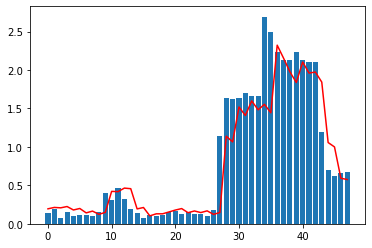

For p= 3
Test MSE: 0.105


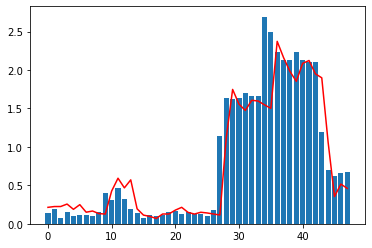

For p= 7
Test MSE: 0.153


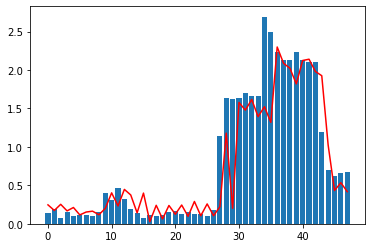

In [49]:
#for different ar degrees
for i in [1,3,7]:
    train = house1[0:960]
    test = house1[960:960+48]
    predictions = list()
    for t in range(int(len(test)/2)):
        model = ARIMA(train, order=(i,0,2))
        model_fit = model.fit(disp=-1)
        output = model_fit.forecast(steps=2)
        yhat = output[0]
        predictions = np.append(predictions,yhat)
        obs = test[2*t:2*t+2]
        train = np.append(train,obs)
    
    print('For p=', i)
    error = mean_squared_error(test, predictions)
    print('Test MSE: %.3f' % error)
    #plot
    plt.figure()
    plt.bar(np.arange(48),test)
    plt.plot(np.arange(48),predictions,color='red')
    plt.show()

For q= 0
Test MSE: 0.110


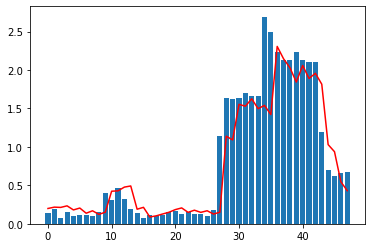

For q= 1
Test MSE: 0.111


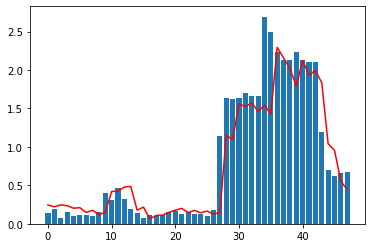

For q= 3
Test MSE: 0.134


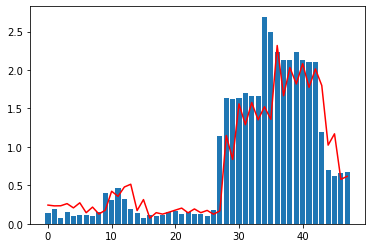

In [50]:
#for different ma degrees
for i in [0,1,3]:
    train = house1[0:960]
    test = house1[960:960+48]
    predictions = list()
    for t in range(int(len(test)/2)):
        model = ARIMA(train, order=(5,0,i))
        model_fit = model.fit(disp=-1)
        output = model_fit.forecast(steps=2)
        yhat = output[0]
        predictions = np.append(predictions,yhat)
        obs = test[2*t:2*t+2]
        train = np.append(train,obs)
    
    print('For q=', i)
    error = mean_squared_error(test, predictions)
    print('Test MSE: %.3f' % error)
    #plot
    plt.figure()
    plt.bar(np.arange(48),test)
    plt.plot(np.arange(48),predictions,color='red')
    plt.show()

For steps= 4
Test MSE: 1.168


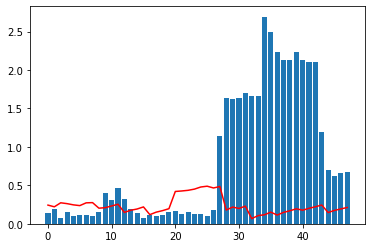

For steps= 8
Test MSE: 1.034


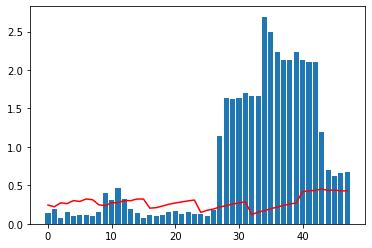

For steps= 12
Test MSE: 1.047


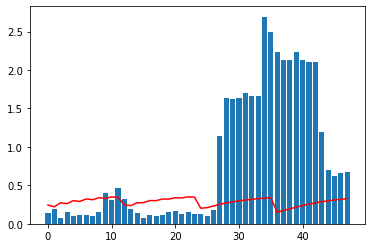

In [52]:
#for different time window
for i in [4,8,12]:
    train = house1[0:960]
    test = house1[960:960+48]
    predictions = list()
    for t in range(int(len(test)/i)):
        model = ARIMA(train, order=(5,0,2))
        model_fit = model.fit(disp=-1)
        output = model_fit.forecast(steps=i)
        yhat = output[0]
        predictions = np.append(predictions,yhat)
        obs = test[2*t:2*t+2]
        train = np.append(train,obs)
    
    print('For steps=', i)
    error = mean_squared_error(test, predictions)
    print('Test MSE: %.3f' % error)
    #plot
    plt.figure()
    plt.bar(np.arange(48),test)
    plt.plot(np.arange(48),predictions,color='red')
    plt.show()

In an autoregression model, we forecast the variable of interest using a linear combination of past values of the variable. The term autoregression indicates that it is a regression of the variable against itself. p is the number of variables that we use.\
Rather than using past values of the forecast variable in a regression, a moving average model uses past forecast errors in a regression-like model. q value is the number of past errors that we use.\
From the first six figures, we could find that more variables do not mean a better prediction, but always leading to time consuming. More degrees mean stricter fix. We need to choose apporpriate degrees. And p=5,q=2 got the best result corresponding the aic. \
For the time windows, we could find that a small step alway has a better result in this test. A larger step result in a fast processing but reduction the number of sample as well. We could clearly see a perdoic of the step=12 figure.

### Question 2.2 (9 pts) Time Series Estimation using DNN/LSTM

Now, we will use DNNs, specifically LSTM to estimate the power consumption of house 1 and house 2. Specifically, we prepare date for estimating the next 24 hour period based on past 24 hours. Note that 24 hours mean 48 data points due to smart meters reporting half-hourly energy usage.

1. Define and train Keras model that consists of LSTM and Dense layers with 48 point input and 48 point output to forecast demand over the next 24 hour period based on past 24 hours. What type of activation function would you use at the output layer? Why? Try different (appropriate) loss functions and optimisers. You can use "mse" and "adam" as default choices. Choose batch_size=128 and epoch=20 as parameters to begin with. You can change these to your liking and are encouraged to experiment.
2. Provide model summary and keep track of training history to provide a plot of loss function over epochs. Make predictions for different days and plot your predictions along with actual data. You can evaluate performance by calculating mean-squared error per day or over multiple days in the test set.
3. _[optional, no points]_ you can try using 1-D CNN layer(s) before LSTM ones as a non-linear filter. Do you observe any improvements?

**Useful documents and functions**
* [Keras model api documentation](https://www.tensorflow.org/api_docs/python/tf/keras), [visualisation](https://www.tensorflow.org/guide/keras/train_and_evaluate#visualizing_loss_and_metrics_during_training), [sequential model](https://www.tensorflow.org/guide/keras/sequential_model).
* _fit, summary, evaluate, predict_
* a few links to resources that may be useful:
>https://pandas.pydata.org/pandas-docs/stable/reference/frame.html#attributes-and-underlying-data
>https://machinelearningmastery.com/time-series-forecasting-methods-in-python-cheat-sheet/ 
>
>https://machinelearningmastery.com/how-to-develop-lstm-models-for-multi-step-time-series-forecasting-of-household-power-consumption/
>
>https://machinelearningmastery.com/multivariate-time-series-forecasting-lstms-keras/
>
>https://blog.goodaudience.com/introduction-to-1d-convolutional-neural-networks-in-keras-for-time-sequences-3a7ff801a2cf
>https://github.com/ni79ls/har-keras-cnn

In [20]:
# sliding window function for next 24 hourly estimate
# see, e.g. https://towardsdatascience.com/using-lstms-to-forecast-time-series-4ab688386b1f
# or https://machinelearningmastery.com/reframe-time-series-forecasting-problem/
def house_data(inseries):
    window_size = 48+48
    series = inseries
    series_s = inseries.copy()
    for i in range(window_size):
        series = pd.concat([series, series_s.shift(-(i+1))], axis = 1)
    series.dropna(axis=0, inplace=True)
    X = series.iloc[:,0:48]
    yday = series.iloc[:,48:48+48] # next day
    return X, yday


# get the estimate data for house1 and house2
X1, yday1 = house_data(house1[0:8736])
X2, yday2 = house_data(house2[0:8736])

X1.shape, yday1.shape

((8640, 48), (8640, 48))

In [21]:
# split into training and test sets for house 1
X1train, X1test, y1train, y1test = train_test_split(X1, yday1)
X1train = np.array(X1train).reshape(X1train.shape[0],X1train.shape[1],1)
X1test = np.array(X1test).reshape(X1test.shape[0],X1test.shape[1],1)

X1train.shape, X1test.shape, y1train.shape, y1test.shape

((6480, 48, 1), (2160, 48, 1), (6480, 48), (2160, 48))

In [22]:
from tensorflow.keras.layers import LSTM
import time
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

In [23]:
model1 = Sequential(name='house1')
model1.add(LSTM(48, input_shape=(X1train.shape[1], X1train.shape[2]), activation='relu'))
model1.add(Dense(48, activation='relu'))
model1.compile(optimizer='adam',
               loss='mse')
history1 = model1.fit(X1train, y1train, epochs=20, batch_size=128, validation_data=(X1test, y1test), verbose=0)

Model: "house1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_10 (LSTM)               (None, 48)                9600      
_________________________________________________________________
dense_10 (Dense)             (None, 48)                2352      
Total params: 11,952
Trainable params: 11,952
Non-trainable params: 0
_________________________________________________________________


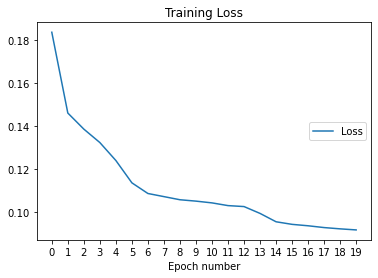

MSE= 0.025614474159880395


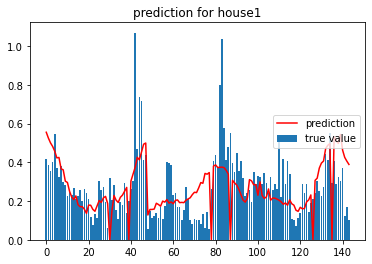

In [28]:
model1.summary()
plt.figure()
plt.plot(history1.history['loss'])
plt.xlabel('Epoch number')
plt.title('Training Loss')
plt.legend(['Loss'], loc='center right')
plt.xticks(range(0,20))
plt.show()
y_pred = model1.predict(X1test[:3, :, :])
plt.figure()
y_pred = y_pred.reshape(-1, 1)
y_true = y1test.to_numpy()[:3, :].reshape(-1, 1)
plt.plot(range(len(y_pred)), y_pred, color='red')
plt.bar(range(len(y_pred)), y_true.reshape(len(y_true)))
print('MSE=', mean_squared_error(y_pred, y_true))
plt.title('prediction for house1')
plt.legend(['prediction', 'true value'], loc='center right')
plt.show()


In [32]:
model1 = Sequential(name='house1withSGD')
model1.add(LSTM(48, input_shape=(X1train.shape[1], X1train.shape[2]), activation='relu'))
model1.add(Dense(48, activation='relu'))
model1.compile(optimizer='SGD',
               loss='mse')
history1 = model1.fit(X1train, y1train, epochs=20, batch_size=128, validation_data=(X1test, y1test), verbose=0)

Model: "house1withSGD"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_12 (LSTM)               (None, 48)                9600      
_________________________________________________________________
dense_12 (Dense)             (None, 48)                2352      
Total params: 11,952
Trainable params: 11,952
Non-trainable params: 0
_________________________________________________________________


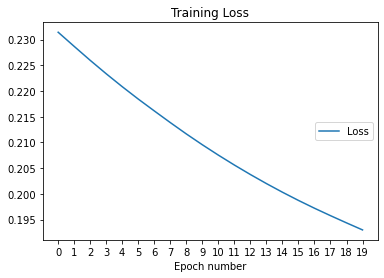

MSE= 0.07239646893747922


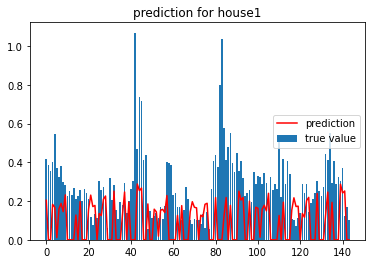

In [33]:
model1.summary()
plt.figure()
plt.plot(history1.history['loss'])
plt.xlabel('Epoch number')
plt.title('Training Loss')
plt.legend(['Loss'], loc='center right')
plt.xticks(range(0,20))
plt.show()
y_pred = model1.predict(X1test[:3, :, :])
plt.figure()
y_pred = y_pred.reshape(-1, 1)
y_true = y1test.to_numpy()[:3, :].reshape(-1, 1)
plt.plot(range(len(y_pred)), y_pred, color='red')
plt.bar(range(len(y_pred)), y_true.reshape(len(y_true)))
print('MSE=', mean_squared_error(y_pred, y_true))
plt.title('prediction for house1')
plt.legend(['prediction', 'true value'], loc='center right')
plt.show()

In [34]:
model1 = Sequential(name='house1withRMSprop')
model1.add(LSTM(48, input_shape=(X1train.shape[1], X1train.shape[2]), activation='relu'))
model1.add(Dense(48, activation='relu'))
model1.compile(optimizer='RMSprop',
               loss='mse')
history1 = model1.fit(X1train, y1train, epochs=20, batch_size=128, validation_data=(X1test, y1test), verbose=0)

Model: "house1withRMSprop"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_13 (LSTM)               (None, 48)                9600      
_________________________________________________________________
dense_13 (Dense)             (None, 48)                2352      
Total params: 11,952
Trainable params: 11,952
Non-trainable params: 0
_________________________________________________________________


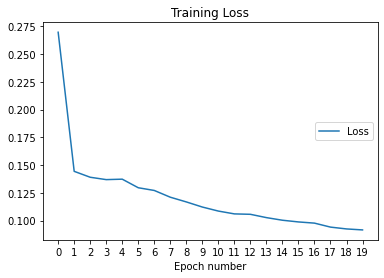

MSE= 0.0234121737334889


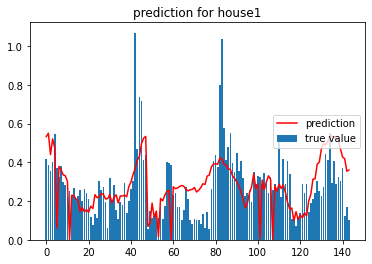

In [35]:
model1.summary()
plt.figure()
plt.plot(history1.history['loss'])
plt.xlabel('Epoch number')
plt.title('Training Loss')
plt.legend(['Loss'], loc='center right')
plt.xticks(range(0,20))
plt.show()
y_pred = model1.predict(X1test[:3, :, :])
plt.figure()
y_pred = y_pred.reshape(-1, 1)
y_true = y1test.to_numpy()[:3, :].reshape(-1, 1)
plt.plot(range(len(y_pred)), y_pred, color='red')
plt.bar(range(len(y_pred)), y_true.reshape(len(y_true)))
print('MSE=', mean_squared_error(y_pred, y_true))
plt.title('prediction for house1')
plt.legend(['prediction', 'true value'], loc='center right')
plt.show()

In [36]:
model1 = Sequential(name='house1withRMSpropandmae')
model1.add(LSTM(48, input_shape=(X1train.shape[1], X1train.shape[2]), activation='relu'))
model1.add(Dense(48, activation='relu'))
model1.compile(optimizer='RMSprop',
               loss='mae')
history1 = model1.fit(X1train, y1train, epochs=20, batch_size=128, validation_data=(X1test, y1test), verbose=0)

Model: "house1withRMSpropandmae"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_14 (LSTM)               (None, 48)                9600      
_________________________________________________________________
dense_14 (Dense)             (None, 48)                2352      
Total params: 11,952
Trainable params: 11,952
Non-trainable params: 0
_________________________________________________________________


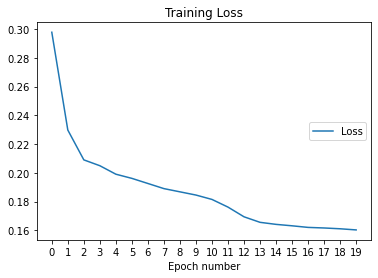

MSE= 0.023821914429690477


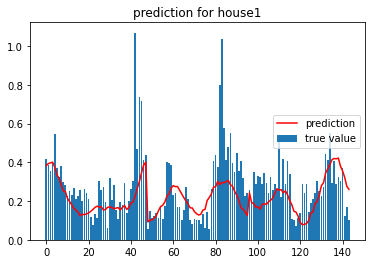

In [37]:
model1.summary()
plt.figure()
plt.plot(history1.history['loss'])
plt.xlabel('Epoch number')
plt.title('Training Loss')
plt.legend(['Loss'], loc='center right')
plt.xticks(range(0,20))
plt.show()
y_pred = model1.predict(X1test[:3, :, :])
plt.figure()
y_pred = y_pred.reshape(-1, 1)
y_true = y1test.to_numpy()[:3, :].reshape(-1, 1)
plt.plot(range(len(y_pred)), y_pred, color='red')
plt.bar(range(len(y_pred)), y_true.reshape(len(y_true)))
print('MSE=', mean_squared_error(y_pred, y_true))
plt.title('prediction for house1')
plt.legend(['prediction', 'true value'], loc='center right')
plt.show()

In [38]:
model1 = Sequential(name='house1withRMSpropandlogcosh')
model1.add(LSTM(48, input_shape=(X1train.shape[1], X1train.shape[2]), activation='relu'))
model1.add(Dense(48, activation='relu'))
model1.compile(optimizer='RMSprop',
               loss='logcosh')
history1 = model1.fit(X1train, y1train, epochs=20, batch_size=128, validation_data=(X1test, y1test), verbose=0)

Model: "house1withRMSpropandlogcosh"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_15 (LSTM)               (None, 48)                9600      
_________________________________________________________________
dense_15 (Dense)             (None, 48)                2352      
Total params: 11,952
Trainable params: 11,952
Non-trainable params: 0
_________________________________________________________________


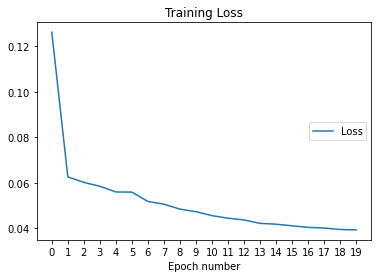

MSE= 0.023491167650278366


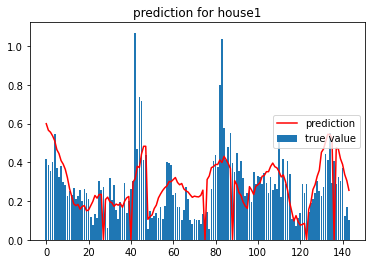

In [39]:
model1.summary()
plt.figure()
plt.plot(history1.history['loss'])
plt.xlabel('Epoch number')
plt.title('Training Loss')
plt.legend(['Loss'], loc='center right')
plt.xticks(range(0,20))
plt.show()
y_pred = model1.predict(X1test[:3, :, :])
plt.figure()
y_pred = y_pred.reshape(-1, 1)
y_true = y1test.to_numpy()[:3, :].reshape(-1, 1)
plt.plot(range(len(y_pred)), y_pred, color='red')
plt.bar(range(len(y_pred)), y_true.reshape(len(y_true)))
print('MSE=', mean_squared_error(y_pred, y_true))
plt.title('prediction for house1')
plt.legend(['prediction', 'true value'], loc='center right')
plt.show()

In [58]:
X2train, X2test, y2train, y2test = train_test_split(X2, yday2)
X2train = np.array(X2train).reshape(X2train.shape[0], X2train.shape[1], 1)
X2test = np.array(X2test).reshape(X2test.shape[0], X2test.shape[1], 1)

In [59]:
model2 = Sequential(name='house2')
model2.add(LSTM(48, input_shape=(X2train.shape[1], X2train.shape[2]), activation='relu'))
model2.add(Dense(48, activation='relu'))
model2.compile(optimizer='adam',
               loss='mse')
history2 = model2.fit(X2train, y2train, epochs=20, batch_size=128, validation_data=(X2test, y2test), verbose=0)

Model: "house2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_23 (LSTM)               (None, 48)                9600      
_________________________________________________________________
dense_23 (Dense)             (None, 48)                2352      
Total params: 11,952
Trainable params: 11,952
Non-trainable params: 0
_________________________________________________________________


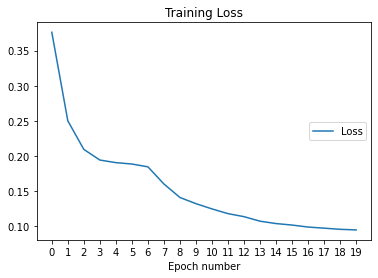

0.08292499262191624


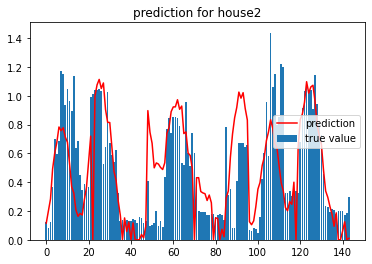

In [60]:
model2.summary()
plt.figure()
plt.plot(history2.history['loss'])
plt.xlabel('Epoch number')
plt.title('Training Loss')
plt.legend(['Loss'], loc='center right')
plt.xticks(range(0,20))
plt.show()
y_pred = model2.predict(X2test[:3,:,:])
plt.figure()
y_pred = y_pred.reshape(-1,1)
y_true = y2test.to_numpy()[:3,:].reshape(-1,1)
plt.plot(range(len(pred)),y_pred,color='red')
plt.bar(range(len(y_pred)), y_true.reshape(len(y_true)))
print(mean_squared_error(y_pred,y_true))
plt.title('prediction for house2')
plt.legend(['prediction','true value'], loc='center right')
plt.show()

**Answer as text here**\
Q2.2.1 & Q2.2.2\
We find the maximum of the data is above 1. The activation function with output range(0,1) such as softmax, sigmoid, tanh .etc will make no sense. In this case, we choose relu as the activation function use at the output layer avoiding to use the scalar which introduces more codes.\
Then we tried to use different optimizers/loss function. 'adam' and 'RMSprop' always have a better performance than 'SGD'.But these two optimizers have a similar result. Since we are using MSE to evaluate the final result, 'mse' is always better than other loss functions.\
After training the model, the validation mse for house1 data is relatively low compare to the ARMA model. But for house2, the mse may change quiet a lot due to the different split of data. It may be affected by the long stright 0.417 in house2 dataset. 

# Reinforcement Learning Overview

**Reinforcement Learning (RL)** has been making headlines the last few years and there are good reasons for it! Extensions of the methods you will see in this workshop have been used to make computers learn [how to play Atari games by themselves](https://openai.com/blog/openai-baselines-dqn/) [(see also this)](https://deepmind.com/research/publications/playing-atari-deep-reinforcement-learning/). The recent advances in [solving most challenging board games](https://deepmind.com/research/alphago/) have been very impressive. Until even ten years ago, many people believed that computers would never learn how to play the game "Go" due to its combinatorial complexity. Today, AlphaGo variants are the first computer program to defeat a professional human Go player, the first program to defeat a Go world champion, and arguably the strongest Go player in history. It is a testament to the power of RL that [AlphaGo Zero](https://deepmind.com/blog/alphago-zero-learning-scratch/) learns to play simply by playing games against itself, starting from completely random play. 

The theoretical foundations of RL have been known for a long while as presented in lectures. Today's successes basically come from well-engineered or designed software that runs on powerful computing systems. Multiple heuristic algorithms and designs verified through extensive experimentation seem to be the key methodology. Despite introducing state-of-the-art concepts, tools, and implementations, this workshop provides only a initial starting point to the world of modern RL.

> Learning more on RL requires good coding skills and a powerful computer (often with a good CUDA-supporting graphic card) or a cloud computing account with one of the major providers. Computer and board games have been the natural playground of modern RL. However, [applications of RL to engineering disciplines](https://blog.insightdatascience.com/using-reinforcement-learning-to-design-a-better-rocket-engine-4dfd1770497a) remains an under-explored and very exciting domain!

## Additional packages to install

From this point on, we will use the [Openai gym](http://gym.openai.com) package for convenience. You can [install a minimum version](https://github.com/openai/gym#installation) simply by using

```conda install -c conda-forge gym``` 

from within the Anaconda environment. This minimal install is sufficient for our purposes. 

(You may or may not need to install [_Build Tools for Visual Studio 2019 (right click to download install instructions)_](./files/Windows_build_tools_install_2019.pdf) if you are using Windows 10.)

_Ask for help from your demonstrator in case you need it._


# Section 3: RL with Multi-armed Bandits

<img align="center" src="img/Las_Vegas_slot_machines.jpg" width="500" hspace="20"/>  

In a **k-armed (multi-armed) bandit** problem, a decision making agent repeatedly chooses one of $k$ different actions. Each action can be interpreted as pulling one of the k-levers. After each choice, the agent receives a reward obtained from a probability distribution that depends on the selected action. The objective is to maximise the expected total reward over a time horizon, for example, over 1000 action selections, or time steps. Multi-armed bandits have [a variety of important applications](https://medium.com/@CornellResearch/whats-behind-your-navigation-app-79d2754e6878) ranging from clinical trials and routing (including navigation) to recommender systems. 

As a special case of _reinforcement learning_, the [multi-armed bandit](https://en.wikipedia.org/wiki/Multi-armed_bandit) problem has actually only a single state. The agent still has to learn the environment represented by the underlying probability distributions and rewards. The problem provides a nice introduction to _reinforcement learning_ and an opportunity to explore the fundamental **exploration versus exploitation** trade-offs involved.

_Hint: Example implementations online (randomly selected, not guaranteed to be correct):_
* https://www.analyticsvidhya.com/blog/2018/09/reinforcement-multi-armed-bandit-scratch-python/
* https://peterroelants.github.io/posts/multi-armed-bandit-implementation/
* https://lilianweng.github.io/lil-log/2018/01/23/the-multi-armed-bandit-problem-and-its-solutions.html
* https://towardsdatascience.com/comparing-multi-armed-bandit-algorithms-on-marketing-use-cases-8de62a851831

In [4]:
%matplotlib notebook
import pandas as pd
import numpy as np
import time
import random
import matplotlib.pyplot as plt
import matplotlib
from collections import deque
from tensorflow.keras.optimizers import Adam
import gym

### 10-armed bandit data set

Let's first (create or) _load_ a random 10-armed data set that approximately matches the description in Section 2.3 of [Sutton and Barto RL book.](http://incompleteideas.net/book/the-book-2nd.html) 

In [3]:
def gen_data(num_bandits=10, T=2000, filename='10armdata'):
    ## function generates a synthetic data set with given parameters 
    ## and saves the result to files folder under the given name
    
    # init data array
    tenarm_data = np.zeros((T,num_bandits))

    # random mean awards
    mean_rewards = np.random.normal(size=num_bandits)
    #print(mean_rewards)
    #print(np.random.normal(0,1,num_bandits))
    for t in range(T):
        tenarm_data[t,:]=np.random.normal(mean_rewards,1,num_bandits)
        
    np.save('./files/'+filename, tenarm_data)


# No need to set the random seed again if you did it in above cells.    
    
#gen_data()
#tenarm_data.shape
#tenarm_data[0:10,:]

# use generated data
tenarm_datal = np.load('./files/10armdata.npy')
tenarm_datal.shape

(2000, 10)

### Multi-armed Bandit Algorithms

We now implement a simple random strategy for selecting actions. The results are also random as expected. This can be considered as pure **exploration** since the algorithm keeps randomly choosing actions. However, note that we do not make proper use of the randomly collected observations yet.

-437.72224422611515


<IPython.core.display.Javascript object>


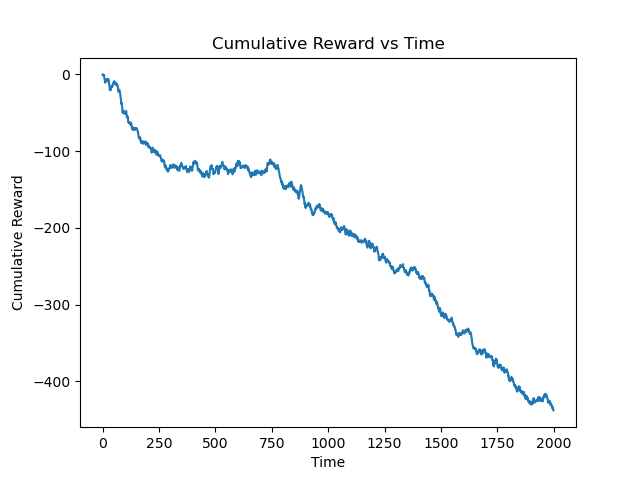

In [4]:
def bandit_random(data=tenarm_datal):
    # random selection bandit algorithm
    
    num_bandits = tenarm_datal.shape[1]
    T = tenarm_datal.shape[0]
    # init storage arrays
    selections = np.zeros(T) # sequence of lever selections
    step_rewards = np.zeros(T) # sequence of step selections
    cum_rewards = np.zeros(T) # sequence of cumulative rewards
    # main loop
    for t in range(T):
        sel = random.randrange(num_bandits)
        selections[t] = sel
        step_rewards[t] = data[t,sel]
        if t>0:
            cum_rewards[t] = step_rewards[t]+cum_rewards[t-1]
        else:
            cum_rewards[t] = step_rewards[t]
            
    total_reward = cum_rewards[-1] # the last one is total reward!
    
    return (selections, step_rewards, cum_rewards, total_reward)
    


(selections, step_rewards, cum_rewards, total_reward) = bandit_random()

print(total_reward)
plt.figure()
plt.title('Cumulative Reward vs Time')
plt.xlabel('Time')
plt.ylabel('Cumulative Reward')
plt.plot(cum_rewards)
plt.show()

Let us consider next a more meaningful strategy, known as **$\varepsilon$-greedy algorithm**. The idea is to explore with a pre-determined fixed probability $\varepsilon<1$ and exploit, i.e. get the maximum reward given current knowledge, with probability $1-\varepsilon$. The observations are now used to estimate the values of actions by averaging. This well-known algorithm is discussed in Section 2.7 of [Sutton and Barto book](http://incompleteideas.net/book/the-book-2nd.html) and described below:

<img align="center" src="img/eps-bandit.png" width="800" hspace="20"/>  

We provide a rudimentary implementation below as a single run.

2996.611369047701


<IPython.core.display.Javascript object>


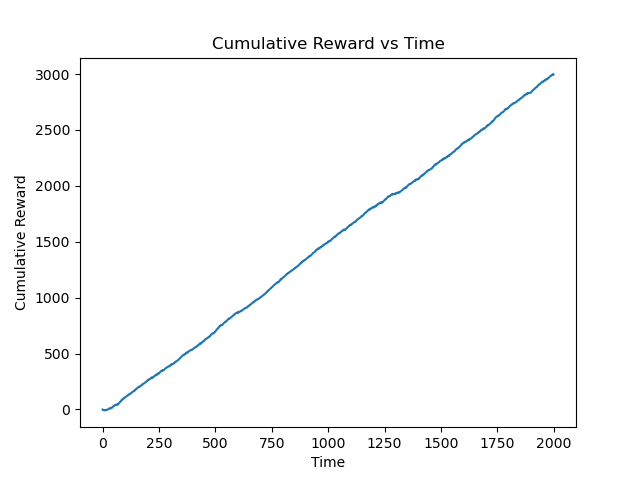

In [5]:
def bandit_epsgreedy(data=tenarm_datal, eps=0.1):
    # epsilon-greedy bandit algorithm
    
    # parameters
    num_bandits = data.shape[1]
    T = data.shape[0]
    
    # init storage arrays
    Q = np.zeros(num_bandits)
    N = np.zeros(num_bandits)
    selections = np.zeros(T) # sequence of lever selections
    step_rewards = np.zeros(T) # sequence of step selections
    cum_rewards = np.zeros(T) # sequence of cumulative rewards
    # main loop
    for t in range(T):
        
        # pull lever
        if np.random.rand() < eps:
            # make a random selection
            sel = random.randrange(num_bandits)
        else:
            # choose the best expected reward
            sel = np.argmax(Q)
            
        # update nbr of selections made
        N[sel] = N[sel] + 1 
        # update mean reward estimate
        Q[sel] = Q[sel] + (1/N[sel])*(data[t,sel]- Q[sel])
        
        # store values
        selections[t] = sel
        step_rewards[t] = data[t,sel]
        if t>0:
            cum_rewards[t] = step_rewards[t]+cum_rewards[t-1]
        else:
            cum_rewards[t] = step_rewards[t]
            
    total_reward = cum_rewards[-1] # the last one is total reward!
    
    return (selections, step_rewards, cum_rewards, total_reward)
    


(selections, step_rewards, cum_rewards, total_reward) = bandit_epsgreedy(eps=0.15)

print(total_reward)
plt.figure()
plt.title('Cumulative Reward vs Time')
plt.xlabel('Time')
plt.ylabel('Cumulative Reward')
plt.plot(cum_rewards)
plt.show()

Next, we run the algorithm over multiple simulations, which we generate by permutating the input data. The obtained average results are naturally less "noisy". **It may take many simulations to get low-variance, averaged results.**

Average total reward =  3005.1471328805546


<IPython.core.display.Javascript object>


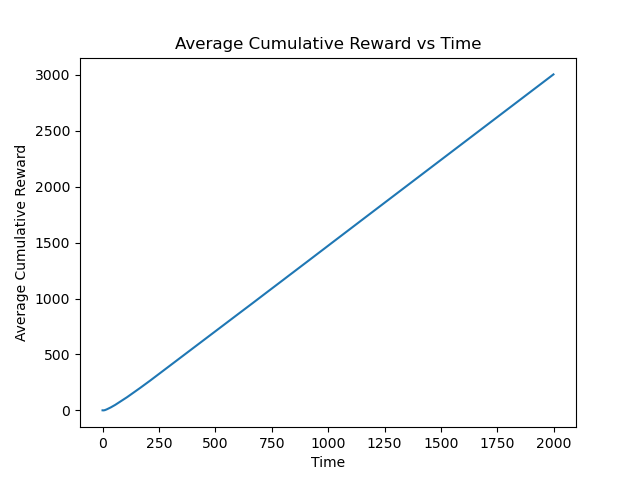

In [6]:
def bandit_epsgreedy_sims(datasim=tenarm_datal, epsilon=0.1, nbr_sims=10):
    # parameters
    num_bandits = datasim.shape[1]
    T = datasim.shape[0]
    
    # store values
    sim_cum_rewards = np.zeros((nbr_sims,T))
    sim_total_rewards = np.zeros(nbr_sims)
    
    for s in range(nbr_sims):
        (dummy,dummy, cum_rewards, total_reward) = bandit_epsgreedy(data=np.random.permutation(datasim),
                                                                    eps=epsilon)
        sim_cum_rewards[s,:] = cum_rewards
        sim_total_rewards[s] = total_reward
    
    return (sim_cum_rewards, sim_total_rewards)


(sim_cum_rewards, sim_total_rewards) = bandit_epsgreedy_sims(epsilon=0.15, nbr_sims=1000)
print('Average total reward = ', np.average(sim_total_rewards))

sim_avg_rewards = np.average(sim_cum_rewards, axis=0)
sim_avg_rewards.shape
plt.figure()
plt.title('Average Cumulative Reward vs Time')
plt.xlabel('Time')
plt.ylabel('Average Cumulative Reward')
plt.plot(sim_avg_rewards)
plt.show()

### Exploration vs Exploitation Trade-off

It is important to investigate the relationship between the outcome (average cumulative reward over time) and $\varepsilon$ parameter. For small $\varepsilon$, the algorithm is more greedy and chooses the best action (given knowledge level, here Q estimate) most of the time. This is called **exploitation** in [reinforcement learning (RL)](https://en.wikipedia.org/wiki/Reinforcement_learning). For large $\varepsilon$, the algorithm spends more time in **exploration** mode and obtains better Q estimates. This **exploration vs exploitation** trade-off is [fundamental to all RL approaches](https://www.coursera.org/lecture/practical-rl/exploration-vs-exploitation-3ExUr), not just multi-armed bandits. The same concepts are also relevant to [dual control](https://en.wikipedia.org/wiki/Dual_control_theory) as well as [adaptive control](https://en.wikipedia.org/wiki/Adaptive_control). 

### Question 1 (8 pts) A Multi-armed bandit for CDN Optimisation

In this question, the problem of real-world data retrieval from multiple redundant sources is investigated. This communication network problem is commonly known as the Content Distribution Network (CDN) problem [(see a relevant paper, right click to download)](./files/performance_of_CDN.pdf). An agent must retrieve data through a network with several redundant sources available. For each retrieval, the agent selects one source and waits until the data is retrieved. The objective of the agent is to minimize the sum of the delays for the successive retrievals. This problem is investigated in Section 4.2 of [this paper, (right click to download)](./files/bandit.pdf) and related [project](http://bandit.sourceforge.net/) as well as discussed in this [practical book](http://shop.oreilly.com/product/0636920027393.do).

We will use a subset of the [publicly available](./files/license.txt) universities web latency networking data set from the [bandit project](http://bandit.sourceforge.net/), which contains retrieval delay/latency measurements from over 700 universities' homepages in milliseconds. Let's decrease the number of bandits (columns) randomly to 20 to make it computationally less time consuming (but you can change this later if you wish). The rewards are the negatives of the delays.

In [7]:
univ_data = pd.read_csv('./files/univ-latencies.csv')
univ_data = -univ_data.sample(n=20, axis=1) #choose 20 columns randomly for computational simplicity
univ_data.head()

,oswego-edu,st-aug-edu,ukans-edu,mines-edu,jwu-edu,cui-edu,rdg-ac-uk,uoc-gr,ovc-edu,andrews-edu,fh-muenster-de,sfasu-edu,redwoods-cc-ca-us,unicatt-it,wayne-edu,uce-ac-uk,dsi-unimi-it,bsc-nodak-edu,uqtr-uquebec-ca,umist-ac-uk
0,-93,-103,-943,-137,-287,-514,-297,-554,-136,-451,-246,-234,-335,-1444,-556,-401,-739,-585,-661,-491
1,-99,-57,-1870,-140,-48,-255,-297,-600,-130,-430,-245,-116,-222,-878,-566,-401,-735,-1340,-809,-494
2,-97,-89,-293,-216,-26,-173,-300,-606,-126,-734,-1013,-63,-90,-798,-581,-401,-732,-302,-652,-489
3,-110,-53,-544,-134,-26,-163,-562,-637,-114,-635,-244,-1399,-1383,-924,-519,-400,-973,-489,-654,-491
4,-95,-53,-1589,-135,-24,-188,-300,-559,-715,-659,-246,-116,-1892,-799,-564,-398,-728,-392,-659,-490


_Answer the following by implementing and simulating well-known multi-armed bandit algorithms._

1. (8 pts) Apply $\varepsilon$-greedy algorithm to the CDN problem. Sample randomly with replacement from the _univ-latencies_ dataset in order to simulate latencies. You should use negative of latencies as rewards here since high latency is not desirable. Try different $\varepsilon$ values to investigate exploration vs exploitation trade-off and the best total average reward.
2. (12 pts) Implement and apply _upper confidence bound_ (UCB) action selection algorithm to the same data set. Compare your results and briefly discuss your findings.

**Answer as text here**\
Q3.1

Average total reward =  -234043.496
Average total reward =  -253489.502
Average total reward =  -275250.976
(1361, 3)


<IPython.core.display.Javascript object>


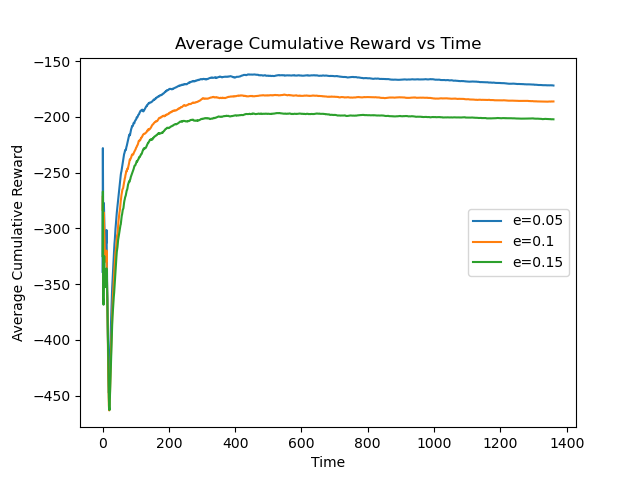

In [10]:
''' Answer as code here '''
test_nbr = 3
sim_cum_rewards = np.zeros((1000, univ_data.shape[0], test_nbr))
sim_total_rewards = np.zeros((1000, test_nbr))
sim_avg_rewards = np.zeros((univ_data.shape[0], test_nbr))
for i in range(test_nbr):
    (sim_cum_rewards[:, :, i], sim_total_rewards[:, i]) = bandit_epsgreedy_sims(datasim=univ_data,
                                                                                epsilon=0.05 * i + 0.05, nbr_sims=1000)
    print('Average total reward = ', np.average(sim_total_rewards[:, i]))
    sim_avg_rewards[:, i] = np.average(sim_cum_rewards[:, :, i], axis=0)

print(sim_avg_rewards.shape)

plt.figure()
plt.title('Average Cumulative Reward vs Time')
plt.xlabel('Time')
plt.ylabel('Average Cumulative Reward')
for j in range(test_nbr):
    plt.plot(sim_avg_rewards[:, j] / (np.arange(len(sim_avg_rewards[:, j])) + 1))
plt.legend(['e=0.05', 'e=0.1', 'e=0.15'], loc='center right')
plt.show()


 epsilon refers to the probability of choosing to explore, and 1-eps is the probability of choosing the previous best action.\
 Exploration provides better estimation. Exploitation provides better rewards.\
With 𝜖 -greedy algorithm, the average cumulative reward will decrease frist and then increase, which means that the optimal action probability will increase by iterations. Finally the optimal action probability will converge to the 1- 𝜖. Although the best algorithm has been found, which means exploit takes the best action, it still has only 1- 𝜖 probility to exploit.\
 \
 Q3.2

UBC=2 Average total reward =  -210881.005


<IPython.core.display.Javascript object>


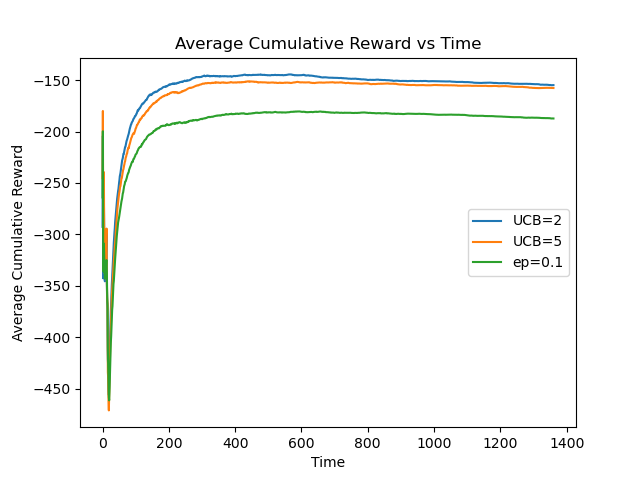

UBC=5 Average total reward =  -214719.125
epsilon-greedy Average total reward =  -254999.201


In [13]:
def bandit_UCB(data=tenarm_datal, ucb=2):
    # modified epsilon-greedy bandit algorithm

    # parameters
    num_bandits = data.shape[1]
    T = data.shape[0]

    # init storage arrays
    Q = np.zeros(num_bandits)
    N = np.zeros(num_bandits)
    selections = np.zeros(T)  # sequence of lever selections
    step_rewards = np.zeros(T)  # sequence of step selections
    cum_rewards = np.zeros(T)  # sequence of cumulative rewards
    # main loop
    for t in range(T):

        # choose lever
        sel = np.argmax(Q + ucb * np.sqrt(np.log(t) / N))

        # update nbr of selections made
        N[sel] = N[sel] + 1
        # update mean reward estimate
        Q[sel] = Q[sel] + (1 / N[sel]) * (data[t, sel] - Q[sel])

        # store values
        selections[t] = sel
        step_rewards[t] = data[t, sel]
        if t > 0:
            cum_rewards[t] = step_rewards[t] + cum_rewards[t - 1]
        else:
            cum_rewards[t] = step_rewards[t]

    total_reward = cum_rewards[-1]  # the last one is total reward!

    return (selections, step_rewards, cum_rewards, total_reward)


def bandit_UCB_sims(datasim=tenarm_datal, ucb=2, nbr_sims=10):
    # parameters
    T = datasim.shape[0]

    # store values
    sim_cum_rewards = np.zeros((nbr_sims, T))
    sim_total_rewards = np.zeros(nbr_sims)
    for s in range(nbr_sims):
        (dummy, dummy, cum_rewards, total_reward) = bandit_UCB(data=np.random.permutation(datasim),
                                                               ucb=ucb)
        sim_cum_rewards[s, :] = cum_rewards
        sim_total_rewards[s] = total_reward
    return (sim_cum_rewards, sim_total_rewards)


(sim_cum_rewards, sim_total_rewards) = bandit_UCB_sims(datasim=univ_data, ucb=2, nbr_sims=1000)
print('UBC=2 Average total reward = ', np.average(sim_total_rewards))
sim_avg_rewards = np.average(sim_cum_rewards, axis=0)

plt.figure()
plt.title('Average Cumulative Reward vs Time')
plt.xlabel('Time')
plt.ylabel('Average Cumulative Reward')
plt.plot(sim_avg_rewards[:] / (np.arange(len(sim_avg_rewards)) + 1))

(sim_cum_rewards, sim_total_rewards) = bandit_UCB_sims(datasim=univ_data, ucb=5, nbr_sims=1000)
print('UBC=5 Average total reward = ', np.average(sim_total_rewards))
sim_avg_rewards = np.average(sim_cum_rewards, axis=0)
plt.plot(sim_avg_rewards[:] / (np.arange(len(sim_avg_rewards)) + 1))

(sim_cum_rewards, sim_total_rewards) = bandit_epsgreedy_sims(datasim=univ_data, epsilon=0.1, nbr_sims=1000)
print('epsilon-greedy Average total reward = ', np.average(sim_total_rewards))
sim_avg_rewards = np.average(sim_cum_rewards, axis=0)
plt.plot(sim_avg_rewards[:] / (np.arange(len(sim_avg_rewards)) + 1))
plt.legend(['UCB=2', 'UCB=5', 'ep=0.1'], loc='center right')
plt.show()

As the number of trials increases, the estimate for each lever becomes more accurate, which mathematically corresponds to an increase in the confidence level of the empirical error.\
We could find little difference between UCB parameters, the probability of best choice of both nearly converge to 1. \
e-greedy chooses blindly when making its attempts, as it is unlikely to choose actions that are close to greedy or have particularly high uncertainty. It is better to choose actions that may in fact be optimal based on their potential, taking into account how close their estimates are to the maximum and the uncertainty of those estimates. We not surprisingly find UCB is better than eps-greedy.

# Section 4. Deep Reinforcement Learning 

In this section, we are going to use  a simple (v1) [cart-pole environment](http://gym.openai.com/envs/CartPole-v1/) from [openai gym](https://gym.openai.com/). In this classic control problem, a pole or [inverted pendulum](https://en.wikipedia.org/wiki/Inverted_pendulum) is attached vertically to a cart, which moves along a frictionless track. The system is controlled by applying a horizontal force of +1 or -1 to the cart. The pendulum starts upright, and the goal is to prevent it from falling over. A reward of +1 is provided for every time step that the pole remains upright. The episode ends when the pole is more than 15 degrees from vertical, or the cart moves more than 2.4 units from the center.

Note that, there are detailed models of the cartpole environment, [see for example this](https://danielpiedrahita.wordpress.com/portfolio/cart-pole-control/), which can be used to develop a variety of model-based solutions. However, we will use this simple environment to illustrate a _model-free,_ purely data-oriented modern **reinforcement learning** approach as discussed in the lectures.

First, let's have a look at the environment by taking random actions. When you run the cell below, you should see a new window with the cartpole environment for a short duration.

In [14]:
env = gym.make('CartPole-v1')
env.reset()
for _ in range(100):
    env.render()
    env.step(env.action_space.sample()) # take a random action
    
time.sleep(2) # wait for 2 seconds
env.close()

### Environment

The figure below left depicts the standard **SARSA** (_State-Action-Reward-State'-Action'_) paradigm. As discussed during lectures, the idea is for the _agent_ to learn the environment and achieve the objective concurrently by taking a mixture of random actions and actions that maximise the cumulative reward. 

The figure below right represents an [implementation within the openai gym environment.](http://gym.openai.com/docs/#observations) In this implementation, _observation_ corresponds to state. 

<img align="left" src="img/sarsa.png" width="500" hspace="20"/>  <img align="center" src="img/openai_env.png" width="300" hspace="20"/>  

The environment is described in detail in the classic publication cited below [(right click to download)](./files/Barto1983.pdf). Note that this predates deep learning so it has more historical value than practical value, other than the model itself.

AG Barto, RS Sutton and CW Anderson, "Neuronlike Adaptive Elements That Can Solve Difficult Learning Control Problem", IEEE Transactions on Systems, Man, and Cybernetics, 1983.

The states and actions are described within the [source code of the environment.](https://github.com/openai/gym/blob/master/gym/envs/classic_control/cartpole.py)

Actions are $\{0,\, 1\}$, corresponding to "Push cart to the left" and "Push cart to the right", respectively.

In [15]:
env = gym.make('CartPole-v0')
print(env.action_space)
env.action_space.n

Discrete(2)


2

In [16]:
print(env.observation_space)

Box(-3.4028234663852886e+38, 3.4028234663852886e+38, (4,), float32)


The states are \[Cart Position, Cart Velocity, Pole Angle, Pole Velocity At Tip\]. The angle is zero when to pole is pointing up. 

In [17]:
env = gym.make('CartPole-v1')
observation = env.reset()
print(np.array([env.reset()]))

[[ 0.03890983 -0.01864158  0.01263598  0.03805827]]


In [18]:
env = gym.make('CartPole-v1')
for episode in range(10):
    observation = env.reset()
    for t in range(100):
        env.render()
        print(observation)
        action = env.action_space.sample() # take a random action
        observation, reward, done, info = env.step(action) # episode ends when done=True based on conditions
        if done:
            print("Episode finished after {} timesteps".format(t+1))
            break
env.close()

[ 0.02175498 -0.0450608  -0.03123275  0.04482494]
[ 0.02085376 -0.23972129 -0.03033625  0.32749234]
[ 0.01605934 -0.43439851 -0.0237864   0.61045632]
[ 0.00737137 -0.2389523  -0.01157727  0.31037738]
[ 0.00259232 -0.4339074  -0.00536973  0.5993868 ]
[-0.00608583 -0.23871074  0.00661801  0.30501733]
[-0.01086004 -0.04368372  0.01271836  0.01442889]
[-0.01173372  0.15125355  0.01300693 -0.27421426]
[-0.00870865  0.34618752  0.00752265 -0.56276656]
[-0.0017849   0.15096082 -0.00373268 -0.26772316]
[ 0.00123432 -0.04410766 -0.00908715  0.02378012]
[ 0.00035217 -0.23909812 -0.00861154  0.31358215]
[-0.0044298  -0.43409635 -0.0023399   0.60353688]
[-0.01311172 -0.62918549  0.00973084  0.89548187]
[-0.02569543 -0.82443803  0.02764047  1.19120762]
[-0.04218419 -1.019907    0.05146463  1.49242435]
[-0.06258233 -1.21561604  0.08131311  1.80072316]
[-0.08689465 -1.41154748  0.11732758  2.11752897]
[-0.1151256  -1.607628    0.15967816  2.4440429 ]
[-0.14727816 -1.41418857  0.20855901  2.20432115]


[ 0.14192219  0.8322495  -0.1446472  -1.29605954]
[ 0.15856718  1.02888193 -0.17056839 -1.63030612]
[ 0.17914482  0.83612523 -0.20317452 -1.39527117]
Episode finished after 27 timesteps
[ 0.03153376  0.04937849  0.02916452 -0.04537508]
[ 0.03252133 -0.14614926  0.02825702  0.25636498]
[ 0.02959835  0.0485581   0.03338432 -0.02727301]
[ 0.03056951 -0.14702631  0.03283886  0.27575329]
[ 0.02762898 -0.34260102  0.03835392  0.57861008]
[ 0.02077696 -0.14803699  0.04992613  0.29825195]
[ 0.01781622 -0.34383375  0.05589116  0.60625332]
[ 0.01093955 -0.14953603  0.06801623  0.33168528]
[ 0.00794883 -0.34555688  0.07464994  0.64501805]
[ 0.00103769 -0.54163537  0.0875503   0.96024337]
[-0.00979502 -0.3477924   0.10675517  0.69629948]
[-0.01675087 -0.1543002   0.12068115  0.43903993]
[-0.01983687  0.03892548  0.12946195  0.18670363]
[-0.01905836  0.23198039  0.13319603 -0.06249977]
[-0.01441875  0.03522514  0.13194603  0.26906291]
[-0.01371425 -0.16150877  0.13732729  0.60027835]
[-0.01694443  

### DQN Agent

We now create a DQN agent class, which implements the behaviour of the agent based on the [famous paper (right click to download)](./files/dqn.pdf). This implementation is based on Algorithm 1 (Deep Q-learning with Experience Replay) on page 5.  

* _Mnih, Volodymyr, Koray Kavukcuoglu, David Silver, Alex Graves, Ioannis Antonoglou, Daan Wierstra, and Martin Riedmiller. "Playing atari with deep reinforcement learning." arXiv preprint arXiv:1312.5602 (2013)._


In [5]:
class CartPoleDQN:
    def __init__(self, environment):
        
        # from cartpole environment
        self.env = environment
        self.nbr_states = self.env.observation_space.shape[0]
        self.nbr_actions = self.env.action_space.n
        
        # to store (state,action,reward)
        self.memory = deque(maxlen=1000000)
        self.scores=[]
        
        # parameters
        self.gamma = 0.95    # discount rate
        self.epsilon = 1    # exploration rate
        self.epsilon_min = 0.01
        self.epsilon_decay = 0.995 
        self.batch_size = 16
        
        # build the DNN model
        self.build_model()
        
        
    def build_model(self):
        """ Define Keras DNN model """
        
        
        self.rlmodel = Sequential()
        self.rlmodel.add(tf.keras.Input(shape=(self.nbr_states,)))
        self.rlmodel.add(Dense(16, activation='relu'))
        self.rlmodel.add(Dense(4, activation='relu'))
        self.rlmodel.add(Dense(self.nbr_actions, activation='linear'))


        self.rlmodel.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),loss=tf.keras.losses.MeanSquaredError())
    
        
    
    def save_model(self, filename):
        
        self.rlmodel.save(filename+".h5")
        
        
    def load_model(self, filename):
        
        self.rlmodel = tf.keras.models.load_model(filename)
        
    def remember(self, state, action, reward, next_state, done):
        # store the SARSA from observation
        self.memory.append((state, action, reward, next_state, done))
        
    
    def act(self, state):
        
        if np.random.rand() < self.epsilon:
            return self.env.action_space.sample()
        else:
            q_values = self.rlmodel.predict(state)[0]
            return np.argmax(q_values)
        
    
    def update_model(self):
        
        if len(self.memory) < self.batch_size:
            return
        
        # sample the mini-batch
        mini_batch=random.sample(self.memory, self.batch_size)
        
        # experience replay
        for state, action, reward, state_next, done in mini_batch:
            if done:
                q_update = reward
            else:
                q_update = reward + self.gamma*np.amax(self.rlmodel.predict(state_next)[0])
            q = self.rlmodel.predict(state)
            q[0][action] = q_update
            self.rlmodel.fit(state, q, batch_size=self.batch_size, verbose=0)

        
        # update exploration/exploitation balance
        if self.epsilon > self.epsilon_min:
            self.epsilon *= self.epsilon_decay
        else:
            self.epsilon=self.epsilon_min

### Experiments and Training - Agent in Environment

The interaction of the agent with the environment is simulated below. Each **episode** ends when control fails, [defined as](https://gym.openai.com/envs/CartPole-v1/) the pole being more than 15 degrees from vertical, or the cart moving more than 2.4 units from the centre. 

A **reward** of $+1$ is given for every time step that the pole remains uprigh, so the **score** per episode is the number of steps where the control is successful.

In [23]:
env=gym.make('CartPole-v1')
dqn_agent = CartPoleDQN(environment=env)
for episode in range(10):
    # init episode
    state = env.reset()
    state = np.reshape(state, [1, dqn_agent.nbr_states]) # reshape for keras
    score = 0
    done = False
    # experience loop in episode
    while not done:
        #env.render()
        # action and state evolves
        action = dqn_agent.act(state)
        state_next, reward, done, info = env.step(action)        
        state_next = np.reshape(state_next, [1, dqn_agent.nbr_states]) # reshape for keras
        
        # have we failed, then no reward to add in this last step
        if done:
            reward = 0  # no reward for last time step
        score = score + reward
        
        # store experience in memory
        dqn_agent.remember(state, action, reward, state_next, done)
        state = state_next
        
        # train model
        dqn_agent.update_model()
        
        # if failed, end episode
        if done:
            dqn_agent.scores.append(score)
            print("Episode:", episode, "  Score:", score, "  memory length:",
                      len(dqn_agent.memory), "  epsilon:", dqn_agent.epsilon)
            break

env.close()
print("training completed!")

Episode: 0   Score: 51.0   memory length: 52   epsilon: 0.8307187014821328
Episode: 1   Score: 28.0   memory length: 81   epsilon: 0.7183288830986236
Episode: 2   Score: 13.0   memory length: 95   epsilon: 0.6696478204705644
Episode: 3   Score: 11.0   memory length: 107   epsilon: 0.6305556603555866
Episode: 4   Score: 13.0   memory length: 121   epsilon: 0.5878229785513479
Episode: 5   Score: 10.0   memory length: 132   epsilon: 0.5562889678716474
Episode: 6   Score: 15.0   memory length: 148   epsilon: 0.5134164023722473
Episode: 7   Score: 10.0   memory length: 159   epsilon: 0.4858739637363176
Episode: 8   Score: 12.0   memory length: 172   epsilon: 0.45522245551230495
Episode: 9   Score: 8.0   memory length: 181   epsilon: 0.4351424010585501
training completed!


### Performance Evaluation

The original **criterion for success** is [defined as](https://gym.openai.com/envs/CartPole-v1/) getting an average reward of greater or equal than 195.0 over 100 consecutive trials. We relax this in order to (literally) save time. Let's consider a more modest version with an _average reward >=100 over 10 consecutive trials._

In [24]:
np.average(dqn_agent.scores)

17.1

<IPython.core.display.Javascript object>


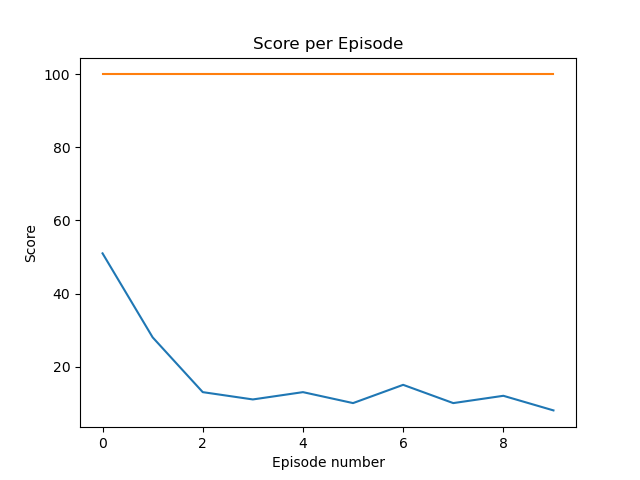

In [25]:
plt.figure()
plt.title('Score per Episode')
plt.xlabel('Episode number')
plt.ylabel('Score')
plt.plot(dqn_agent.scores)
plt.plot(np.ones((len(dqn_agent.scores),1))*100)
plt.show()

### Resulting DQN Model

We now look a bit closer to the DNN underlying the DQN model we have trained.

In [26]:
dqn_agent.rlmodel.summary()
print(dqn_agent.rlmodel.get_weights())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 16)                80        
_________________________________________________________________
dense_4 (Dense)              (None, 4)                 68        
_________________________________________________________________
dense_5 (Dense)              (None, 2)                 10        
Total params: 158
Trainable params: 158
Non-trainable params: 0
_________________________________________________________________
[array([[-0.23613554,  7.573379  ,  7.064841  ,  7.483925  , -0.6737482 ,
         3.756827  ,  7.0895534 ,  7.381246  ,  0.55537623, -0.22649701,
         7.55674   ,  0.4098423 ,  6.692268  ,  6.4069686 ,  6.133652  ,
         7.3353553 ],
       [-0.22838704, 13.937814  , 13.151177  , 13.987686  ,  0.22659503,
         0.9461043 , 13.856319  , 14.326407  , -0.26523927, -0.6826228 

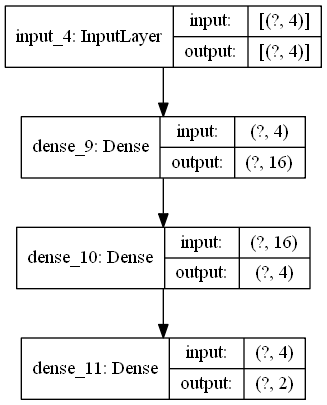

In [45]:
# Plot model graph
# you need to install pydot and graphviz via anaconda for this to work! restart notebook after installing these...
tf.keras.utils.plot_model(dqn_agent.rlmodel, "model.png" ,show_shapes=True)

### Visual test

We save our trained model to a file for reuse, which makes a lot of sense given the time spent on training. Then, we illustrate the performance of the model visually. Note that because we have cut the training short to save time, the result is rather sub-optimal.

In [27]:
# we save the trained model 
dqn_agent.save_model('dqn_train2')

In [28]:
# A few episodes to watch the behaviour

env = gym.make('CartPole-v1')
dqn_agent_test = CartPoleDQN(environment=env)
dqn_agent_test.load_model('dqn_train2.h5')
dqn_agent_test.epsilon = 0 # no random movements

for episode in range(5):
    state = env.reset()
    state = np.reshape(state, [1, dqn_agent_test.nbr_states]) # reshape for keras
    for t in range(150): # increase to 200 to see termination
        env.render()
        action = dqn_agent_test.act(state)
        state_next, reward, done, info = env.step(action)  
        state = np.reshape(state_next, [1, dqn_agent_test.nbr_states]) # reshape for keras
        if done:
            print("Episode finished after {} timesteps".format(t+1))
            break
env.close()

Episode finished after 10 timesteps
Episode finished after 10 timesteps
Episode finished after 10 timesteps
Episode finished after 10 timesteps
Episode finished after 10 timesteps


### Question 2 (10 pts)

This question aims to motivate you to fully understand and improve upon the example possibly **suboptimal** DQN implementation above. <br/>
_Hint: a good model is quite similar to what is provided so minor tweaking should work!_

1. How does this DQN differ from classical Q-learning (see e.g. Section 6.5 of Sutton and Barto RL book)? Clearly identify and discuss similarities as well as differences. In addition, briefly describe the relationship to value iteration and dynamic programming (via Bellman's equation).
2. Improve the performance of the DQN by changing the underlying DNN architecture, training method, and _epsilon_ parameter and its decay which controls the exploration vs exploitation trade-off. Interpret and discuss your findings, e.g. what works and does not work and why? 
3. _[Optional, no marks]_ Do you see a high-level similarity between epsilon parameter and diminishing step size in gradient optimisation algorithms? 
4. _[Optional, no marks]_ Try different DNN architectures as well as approaches, e.g. A3C or [beyond](https://towardsdatascience.com/advanced-reinforcement-learning-6d769f529eb3).

_Hint: example implementations from the Web (which may be incorrect):_

* https://towardsdatascience.com/cartpole-introduction-to-reinforcement-learning-ed0eb5b58288
* https://gym.openai.com/envs/CartPole-v0/
* https://github.com/rlcode/reinforcement-learning


**Answer as text here**\
Q4.2.1\
In traditional graph search, we generally use a Q-table matrix to record the experience learned at each step (we generally call "experience" "maximum gain", that is, what is the maximum gain that can be obtained by taking this step), and update the Q-table at each step. Update the Q-table once for each step, i.e., add the knowledge learned in this step to the Q-table. After the Q-table iterates to a certain level, the Q-table becomes stable, and then we use the Q-table to make decisions, because we can learn how to get the maximum benefit from each step through the Q-table.\
Instead of using the Q-table to record the maximum gain Q value, DQN uses the neural network to predict the gain value Q corresponding to the execution of a certain action.\
![image-2.png](img/image.png)
\
Q4.2.2

Episode: 0   Score: 28.0   memory length: 29   epsilon: 1
Episode: 1   Score: 20.0   memory length: 50   epsilon: 1
Episode: 2   Score: 33.0   memory length: 84   epsilon: 0.9792086759647052
Episode: 3   Score: 24.0   memory length: 109   epsilon: 0.9550199818235596
Episode: 4   Score: 20.0   memory length: 130   epsilon: 0.9351638519212846
Episode: 5   Score: 22.0   memory length: 153   epsilon: 0.9138900318559524
Episode: 6   Score: 27.0   memory length: 181   epsilon: 0.8886435861147077
Episode: 7   Score: 57.0   memory length: 239   epsilon: 0.838544138970058
Episode: 8   Score: 15.0   memory length: 255   epsilon: 0.8252275899809898
Episode: 9   Score: 42.0   memory length: 298   epsilon: 0.790477901043851
Episode: 10   Score: 135.0   memory length: 434   epsilon: 0.6899158648955466
Episode: 11   Score: 83.0   memory length: 518   epsilon: 0.6343035511776761
Episode: 12   Score: 41.0   memory length: 560   epsilon: 0.6082017260423355
Episode: 13   Score: 153.0   memory length: 714

<IPython.core.display.Javascript object>


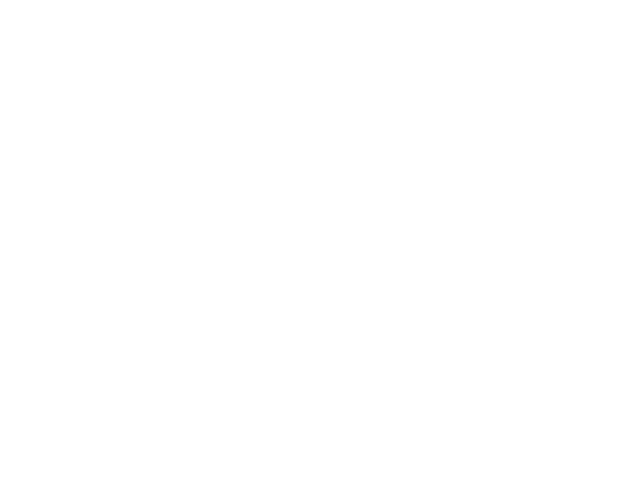

In [6]:
''' Answer as code here '''
class CartPoleDQN:
    def __init__(self, environment):

        # from cartpole environment
        self.env = environment
        self.nbr_states = self.env.observation_space.shape[0]
        self.nbr_actions = self.env.action_space.n

        # to store (state,action,reward)
        self.memory = deque(maxlen=1000000)
        self.scores = []

        # parameters
        self.gamma = 0.9  # discount rate
        self.epsilon = 1  # exploration rate
        self.epsilon_min = 0.01
        self.epsilon_decay = 0.999
        self.batch_size = 64

        # build the DNN model
        self.build_model()

    def build_model(self):
        """ Define Keras DNN model """

        self.rlmodel = Sequential()
        self.rlmodel.add(tf.keras.Input(shape=(self.nbr_states,)))
        self.rlmodel.add(Dense(16, activation='relu',
                               kernel_initializer='he_uniform'))
        self.rlmodel.add(Dense(16, activation='relu',
                               kernel_initializer='he_uniform'))
        self.rlmodel.add(Dense(self.nbr_actions, activation='linear',
                               kernel_initializer='he_uniform'))

        self.rlmodel.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                             loss=tf.keras.losses.MeanSquaredError())

    def save_model(self, filename):

        self.rlmodel.save(filename + ".h5")

    def load_model(self, filename):

        self.rlmodel = tf.keras.models.load_model(filename)

    def remember(self, state, action, reward, next_state, done):
        # store the SARSA from observation
        self.memory.append((state, action, reward, next_state, done))

    def act(self, state):

        if np.random.rand() < self.epsilon:
            return self.env.action_space.sample()
        else:
            q_values = self.rlmodel.predict(state)[0]
            return np.argmax(q_values)

    def update_model(self):

        if len(self.memory) < self.batch_size:
            return

        # sample the mini-batch
        mini_batch = random.sample(self.memory, self.batch_size)

        # experience replay
        for state, action, reward, state_next, done in mini_batch:
            if done:
                q_update = reward
            else:
                q_update = reward + self.gamma * np.amax(self.rlmodel.predict(state_next)[0])
            q = self.rlmodel.predict(state)
            q[0][action] = q_update
            self.rlmodel.fit(state, q, batch_size=self.batch_size, verbose=0)

        # update exploration/exploitation balance
        if self.epsilon > self.epsilon_min:
            self.epsilon *= self.epsilon_decay
        else:
            self.epsilon = self.epsilon_min


env = gym.make('CartPole-v1')
dqn_agent = CartPoleDQN(environment=env)
for episode in range(50):
    # init episode
    state = env.reset()
    state = np.reshape(state, [1, dqn_agent.nbr_states])  # reshape for keras
    score = 0
    done = False
    # experience loop in episode
    while not done:
        # env.render()
        # action and state evolves
        action = dqn_agent.act(state)
        state_next, reward, done, info = env.step(action)
        state_next = np.reshape(state_next, [1, dqn_agent.nbr_states])  # reshape for keras

        # have we failed, then no reward to add in this last step
        if done:
            reward = 0  # no reward for last time step
        score = score + reward

        # store experience in memory
        dqn_agent.remember(state, action, reward, state_next, done)
        state = state_next

        # train model
        dqn_agent.update_model()

        # if failed, end episode
        if done:
            dqn_agent.scores.append(score)
            print("Episode:", episode, "  Score:", score, "  memory length:",
                  len(dqn_agent.memory), "  epsilon:", dqn_agent.epsilon)
            break

env.close()
print("training completed!")

plt.figure()
plt.title('Score per Episode')
plt.xlabel('Episode number')
plt.ylabel('Score')
plt.plot(dqn_agent.scores)
plt.plot(np.ones((len(dqn_agent.scores), 1)) * 100)
plt.show()

<IPython.core.display.Javascript object>


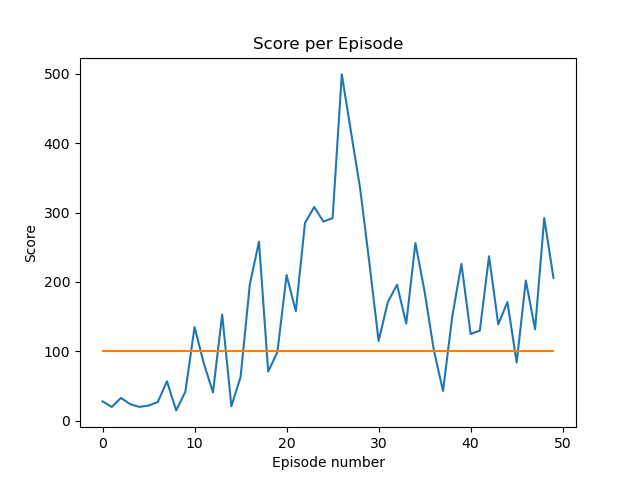

Solved after 24 episodes with average score 113.2,which is bigger than 100.
Solved after 29 episodes with average score 197.55,which is bigger than 190.


In [12]:
plt.figure()
plt.title('Score per Episode')
plt.xlabel('Episode number')
plt.ylabel('Score')
plt.plot(dqn_agent.scores)
plt.plot(np.ones((len(dqn_agent.scores), 1)) * 100)
plt.show()
for i in range(30):
    if(np.average(dqn_agent.scores[i:i+20])>100):
        print('Solved after {} episodes with average score {},which is bigger than 100.'.format(i+20,np.average(dqn_agent.scores[i:i+20])))
        break
    if (i == 29):
        print('Unsolvod.')
for i in range(30):
    if(np.average(dqn_agent.scores[i:i+20])>190):
        print('Solved after {} episodes with average score {},which is bigger than 190.'.format(i+20,np.average(dqn_agent.scores[i:i+20])))
        break
    if (i == 29):
        print('Unsolvod.')

We could find our model become successed and stable after 20 episodes.\
\
The batch size is too small and will not converge in time,but when the batch size is too large memory is easily insufficient.\
\
The GAMMA values = 0.9, 0.95, and 0.99 were tested, respectively, with all other hyperparameters being the same.\
They all converge to the same good, but the value of 0.9 converges faster. For 0.99, the progress of converge is not very stable.\
I guess the higher value of GAMMA indicates that we want the agent to focus more on the future, which is more difficult than focusing more on the immediate future, and therefore training is more slow and difficult.\
\
A too small learning rate may lead to a local optimum at the beginning. But an overly high learning rate works well in the initial stage, when the number of samples is small (although it may be that it is overfitting). As the number of learning samples increases and the learning task becomes more and more complex, the too high learning rate leads to poor convergence and remains in oscillation. So we choose 1e-3 as the lr.\
\
Since the DQN needs to calculate the assessed value after taking a certain action, a linear output is preferable; and using MSE can can describe the gap between two data, so MSE is the best choice. This deals with a regression problem. And for the classification problem, we need to deal with the nonlinear ones, because the final result needs to divide the data into probabilities, which are generally handled using classification functions such as softmax. For the internal hidden layer of DQN, the Relu function is generally taken for nonlinear mapping to increase the state space that the function can represent. So, we choose two 16 point relu with kernel initializer as the DNN.\
\
In supervised learning it is common to keep track of the validation loss during training. Once this validation loss starts to increase, training should be stopped.


# <font color='red'> Workshop Report Submission Instructions </font>

_You should ideally complete the workshop tasks on time and attend respective session to get help from your demonstrator!_ **Submission deadlines will be announced on Canvas.**

It is **mandatory to follow all of the submissions guidelines** given below. _Don't forget the Report submission information on top of this notebook!_

1. The completed Jupyter notebook and its Pdf version (you can simply print-preview and then print as pdf from within your browser) should be uploaded to the right place in Canvas by the announced deadline. _It is your responsibility to follow the announcements!_ **Late submissions will be penalised (up to 100% of the total mark depending on delay amount)!**
2. Filename should be “ELEN90088 Workshop **W: StudentID1-StudentID2** of session **Day-Time**", where **W** refers to the workshop number, **StudentID1-StudentID2** are your student numbers, **Day-Time** is your session day and time, e.g. *Tue-14*.
3. Answers to questions, simulation results and diagrams should be included in the Jupyter notebook as text, code, plots. *If you don't know latex, you can write formulas/text to a paper by hand, scan it and then include as image within Markdown cells.*
4. One report submission per group. 
 
### Additional guidelines for your programs:

* Write modular code using functions. 
* Properly indent your code. But Python forces you do that anyway ;)
* Heavily comment the code to describe your implementation and to show your understanding. No comments, no credit!
* Make the code your own! It is encouraged to find and get inspired by online examples but you should exactly understand, modify as needed, and explain your code via comments. There will be no credit for blind copy/paste even if it somehow works (and it is easier to detect it than you might think)!